<a href="https://colab.research.google.com/github/kkiprono4/Time-Series-Project/blob/main/Team_Miyagi_Google_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction and Overview**

### Defining the Question

A stock market, share market is an aggregation of buyers and sellers of stock(also called shares),which represent ownership claims on businesses; this may include securities listed on a public stock exchange, as well as stock that is only traded privately, such as shares of private companies which are sold to investors through equity crowd funding platforms. Investment is usually made with an investment strategy in mind.

Stocks can be categorized by the country where the company is domiciled.For example, Nestle and Novartis are domiciled in Switzerland and traded on the SIX Swiss Exchange, so they may be considered as the Swiss stock market exchange, although the stocks may also be traded on exchange in other countries, for example, as [GOOG](https://finance.yahoo.com/quote/GOOG/) on U.S stock markets.


### Objectives

**Main objective**

To build a model that would predict the future prices of the stock

**Specific objectives**

To find change in stock price overtime

To determine which month has the highest price in stock



### Metric of success

Model will be considered a success when it achieves a low RMSE

### Context

### Data Description

* Date: The date of that trading day.
* Open: The price of the stock at the very beginning of that trading day but opening price does not need to be equal to the previous day’s closing price.
* High: The highest price the stock had during that trading day.
* Low: The lowest price the stock had during that trading day.
* Close: The price of the stock at closing time of that trading day.
* Adj Close: The adjusted closing price is the closing price of the stock that has been changed to include any distributions and corporate actions that occurred during that trading day.
* Volume: The number of stocks that were traded during that trading day.

### Experimental Design

1.  Installing and Importing libraries
2.  Reviewing the data 
3.  Checking data for errors/anomalies
4.  Tidying dataset
5.  Performing Exploratory Data Analysis
6.  Perfoming predictions

# **2. Installation of the Relevant Libraries**

In [1]:
#Installing the yahoo finance libraries to import the Stock data
!pip install yfinance
!pip install yahoofinancials

!pip install mplfinance

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 30.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=f6ab70347651f7b0e16b8af79ed9b0e4ffdd69b1ff444ab350e057e653e9673c
  Stored in directory: /root/.cache/pip/wheels/4

# **3. Importing the Libraries**

In [122]:
#Importing Pandas library
import pandas as pd

#Importing Lag Plot from Pandas

from pandas.plotting import lag_plot
#Importing Numpy Library
import numpy as np

#Importing Matplotlib Library

import matplotlib.pyplot as plt

#Leveraging Matplotlib for Financial visualization

import mplfinance as mpl

#Importing Seaborn Library

import seaborn as sns

sns.set_theme()

#sns.set_palette('bright')

import math


#Importing the Yahoo Finance API
import yfinance as yf

from yahoofinancials import YahooFinancials

import warnings
warnings.filterwarnings("ignore")


import statsmodels.api as sm

from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Importing the Dick Fueller test
from statsmodels.tsa.stattools import adfuller

#Importing the KPSS test

from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.preprocessing import MinMaxScaler


#Importing Keras for Neural Network Analysis
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping



import fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

## **4. Loading Dataset**

In [3]:
#Downloading Google Stock Data from Yahoo Finance 

data = yf.download(['GOOGL'],           
start='2015-01-01',
end='2022-04-04',
progress=False, actions='inline')
data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2015-01-02,532.599976,535.799988,527.880005,529.549988,529.549988,1324000,0,0
2015-01-05,527.150024,527.989990,517.750000,519.460022,519.460022,2059100,0,0
2015-01-06,520.500000,521.210022,505.549988,506.640015,506.640015,2722800,0,0
2015-01-07,510.950012,511.489990,503.649994,505.149994,505.149994,2345900,0,0
2015-01-08,501.510010,507.500000,495.019989,506.910004,506.910004,3652700,0,0


In [4]:
#We will require a benchmark stock price providing a generalised view of the market price
#We will use the S&P 500 which represents 500 most influential companies in the US
#Downloading S&P 500 2015-2021 Data from Yahoo Finance
sp500 = yf.download('^GSPC',
start='2015-01-01',
end='2022-04-04',
progress=False, actions='inline')

#Previewing the Data
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000,0,0
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000,0,0
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000,0,0
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000,0,0
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000,0,0


In [5]:
#Checking the last rows
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2022-03-28,2818.010010,2840.050049,2796.229980,2829.110107,2829.110107,1752500,0,0
2022-03-29,2852.949951,2875.870117,2840.770020,2850.110107,2850.110107,1715900,0,0
2022-03-30,2849.199951,2854.409912,2832.000000,2838.770020,2838.770020,994200,0,0
2022-03-31,2841.060059,2842.159912,2780.489990,2781.350098,2781.350098,1876200,0,0
2022-04-01,2790.000000,2809.419922,2766.149902,2803.010010,2803.010010,1296700,0,0


## **5. Reviewing Dataset**

In [6]:
#getting the shape of our dataset
data.shape

(1826, 8)

There are 1826 records and 8 columns

In [7]:
#Checking for sum of duplicates
data.duplicated().sum()

0

No presence of duplicates

In [8]:
#Checking for missing values
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

No presence of missing values

In [9]:
#checking the data types 
data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

In [10]:
data['Open']

Date
2015-01-02     532.599976
2015-01-05     527.150024
2015-01-06     520.500000
2015-01-07     510.950012
2015-01-08     501.510010
                 ...     
2022-03-28    2818.010010
2022-03-29    2852.949951
2022-03-30    2849.199951
2022-03-31    2841.060059
2022-04-01    2790.000000
Name: Open, Length: 1826, dtype: float64

In [11]:
#statistical description of our numerical variables
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1.826000e+03,1826.0,1826.0
mean,1280.053149,1292.289987,1267.356474,1280.271988,1280.271988,1.837966e+06,0.0,0.0
std,649.303089,655.674616,642.163796,649.070968,649.070968,9.067918e+05,0.0,0.0
min,499.239990,500.279999,490.910004,497.059998,497.059998,4.656000e+05,0.0,0.0
25%,803.967499,808.172516,798.350006,804.065002,804.065002,1.295950e+06,0.0,0.0
50%,1105.199951,1116.455017,1091.915039,1103.589966,1103.589966,1.602000e+06,0.0,0.0
75%,1457.467468,1469.495026,1438.782501,1453.822510,1453.822510,2.091250e+06,0.0,0.0
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,1.285810e+07,0.0,0.0


In [12]:
#checking for unique values
data['Stock Splits'].unique()

array([0])

In [13]:
#Dropping column
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
data.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,532.599976,535.799988,527.880005,529.549988,529.549988,1324000
2015-01-05,527.150024,527.989990,517.750000,519.460022,519.460022,2059100


The Dividends and Stock split variables were dropped since they have no values other than 0 for all their rows

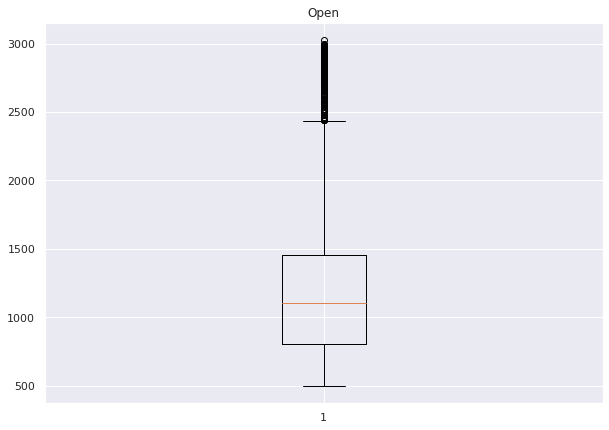

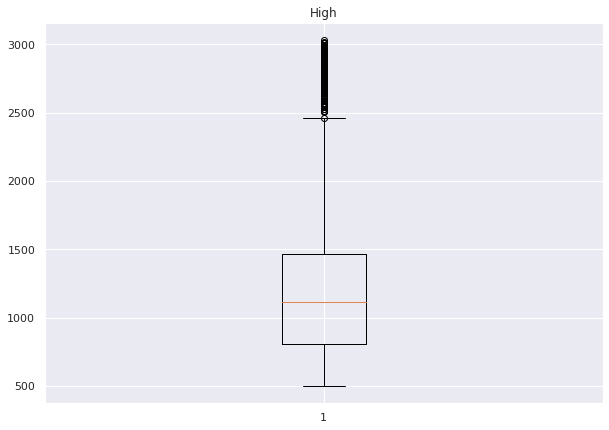

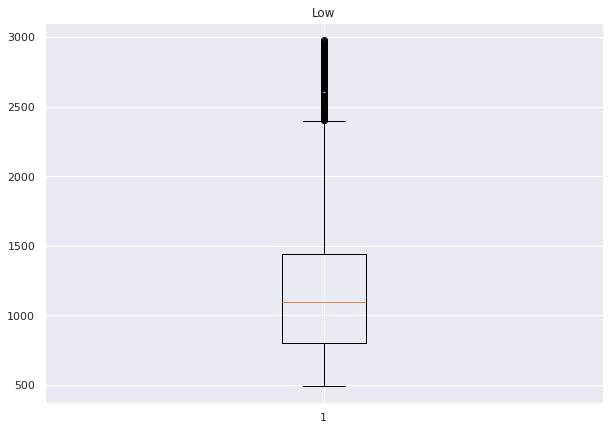

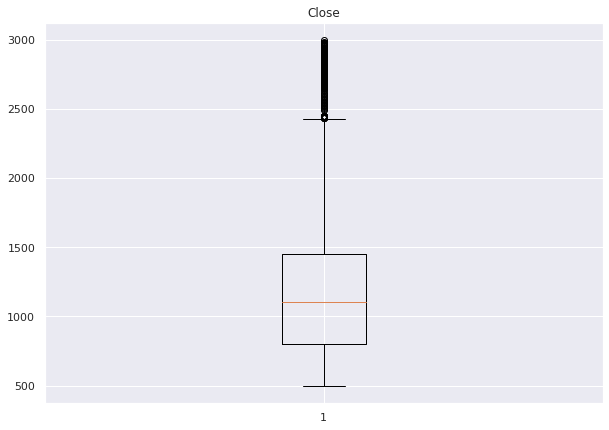

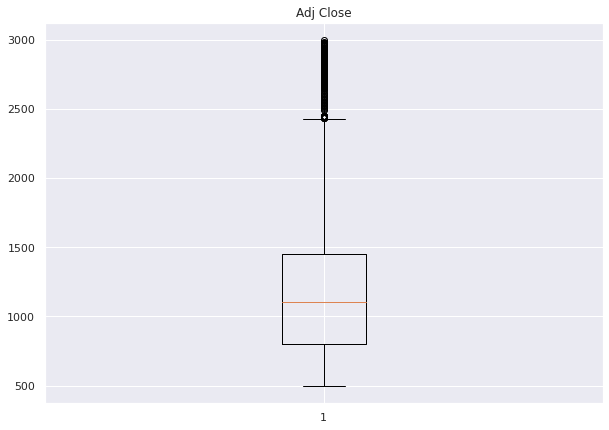

In [14]:
#Checking for outliers
col=['Open',	'High',	'Low',	'Close',	'Adj Close']
for i in col:
  fig=plt.figure(figsize = (10,7))
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()

There is presence of outliers but they won't be dropped since they represent real time data

# **6. Exploratory Data Analysis**

### **Univariate Analysis**

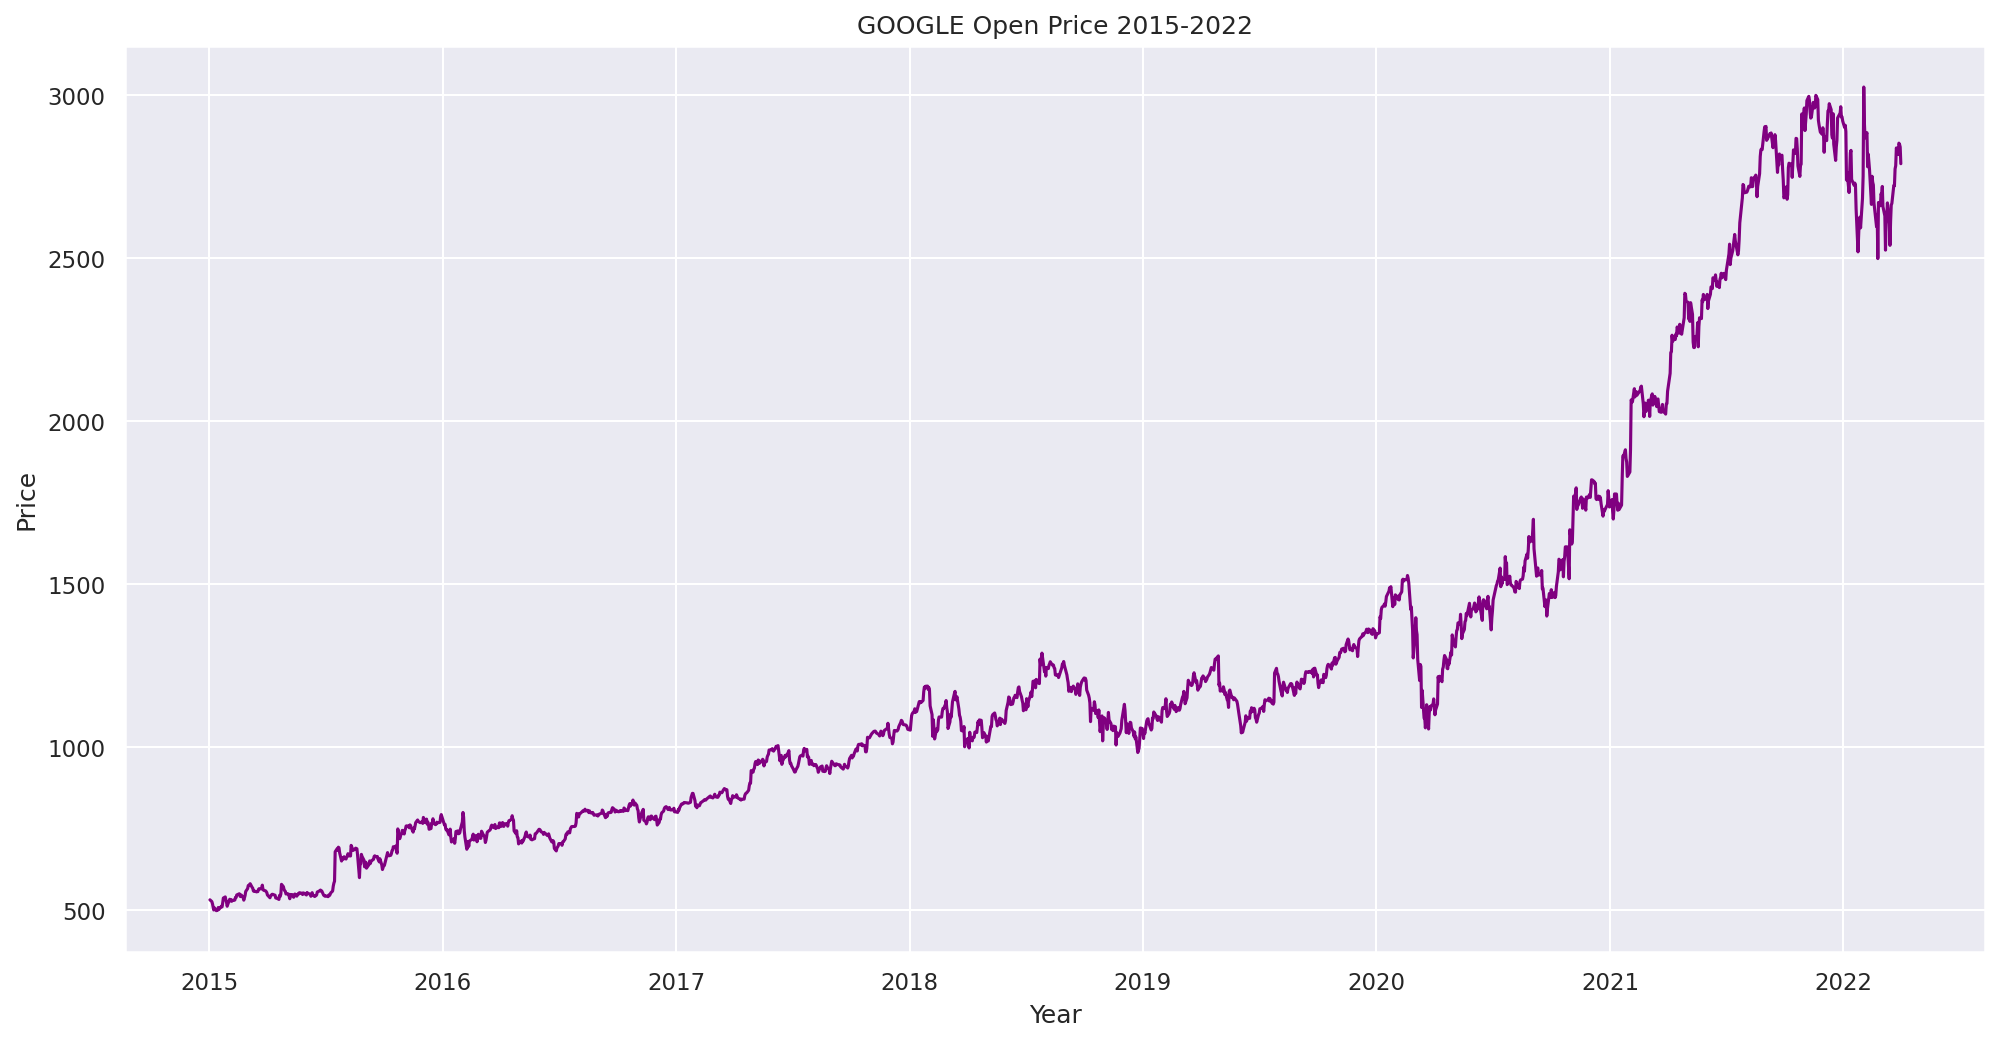

In [15]:
#Plotting GOOGLE stock Open Price

open_data = data["Open"]
plt.figure(figsize=(16,8), dpi=150)
plt.plot(open_data, color= "Purple", label="GOOGL_OPENING PRICE")
plt.title('GOOGLE Open Price 2015-2022')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

From above visualization notice a drastic drop in price in 2020 around March this is due to the covid 19 pandemic

There is also a drop in 2022, this is due to the Ukraine-Russia war

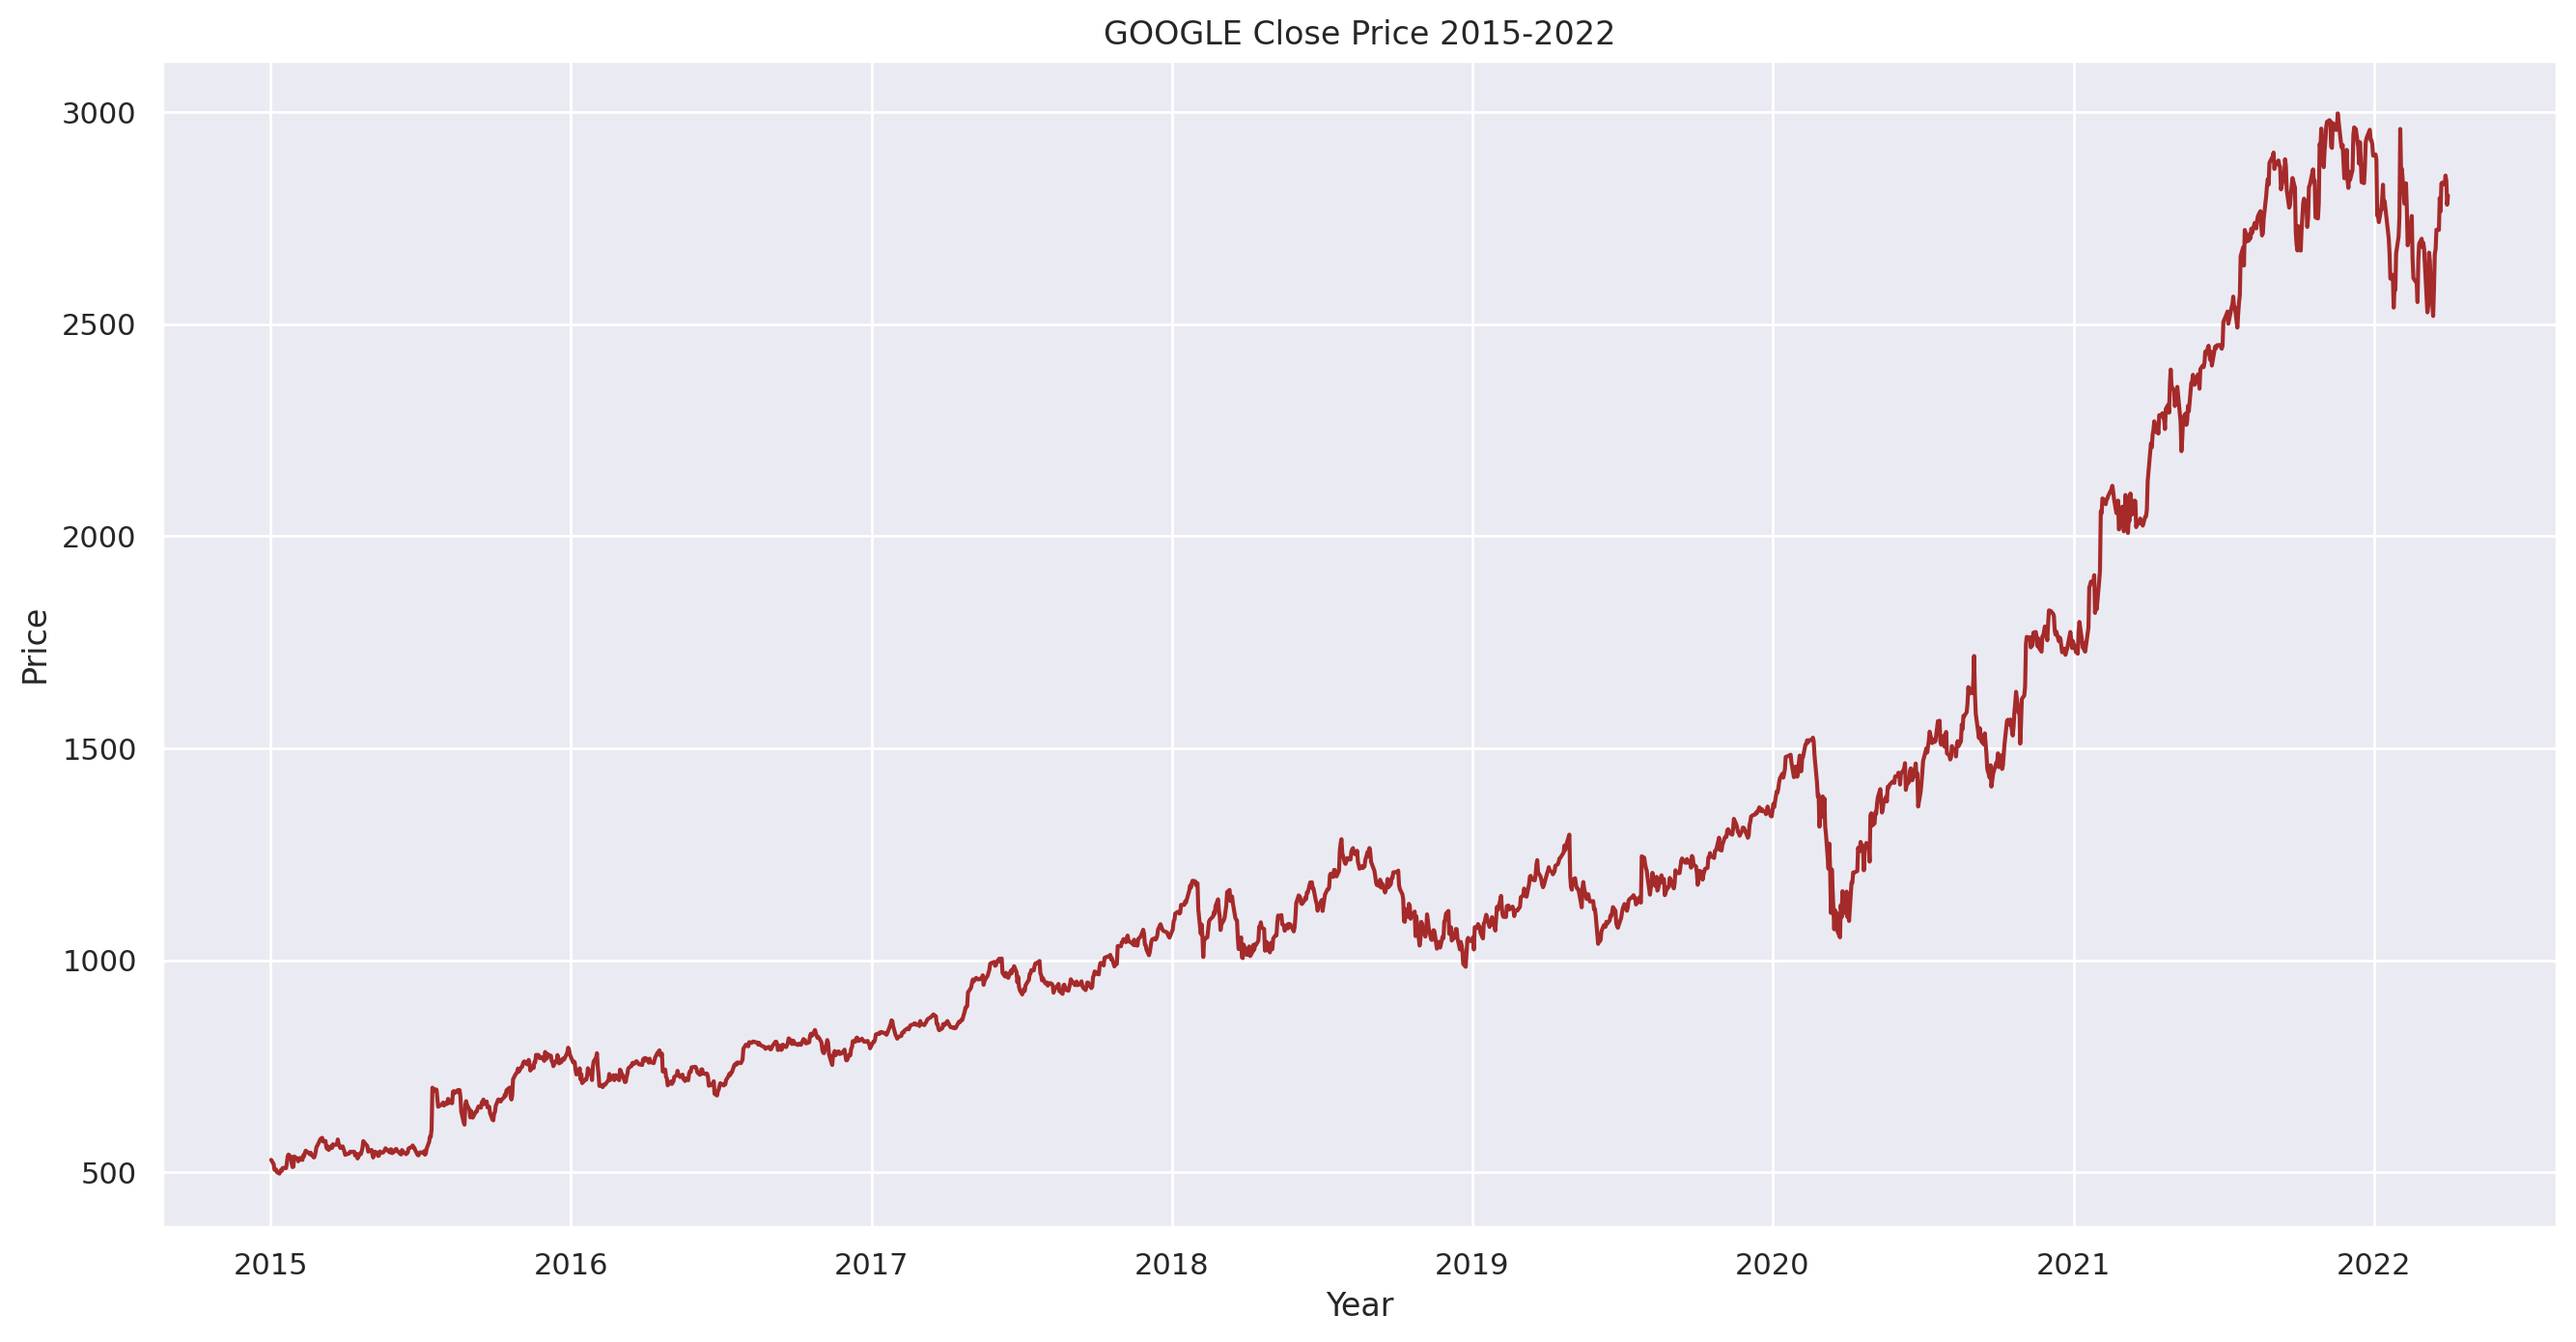

In [16]:
#Plotting GOOGLE stock close Price
close_data = data["Close"]
plt.figure(figsize=(16,8), dpi=200)
plt.plot(close_data, color= "Brown", label="GOOGL_CLOSING PRICE")
plt.title('GOOGLE Close Price 2015-2022')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

From above visualization notice a drastic drop in price in 2020 around March this is due to the covid 19 pandemic

There is also a drop in 2022, this is due to the Ukraine-Russia war

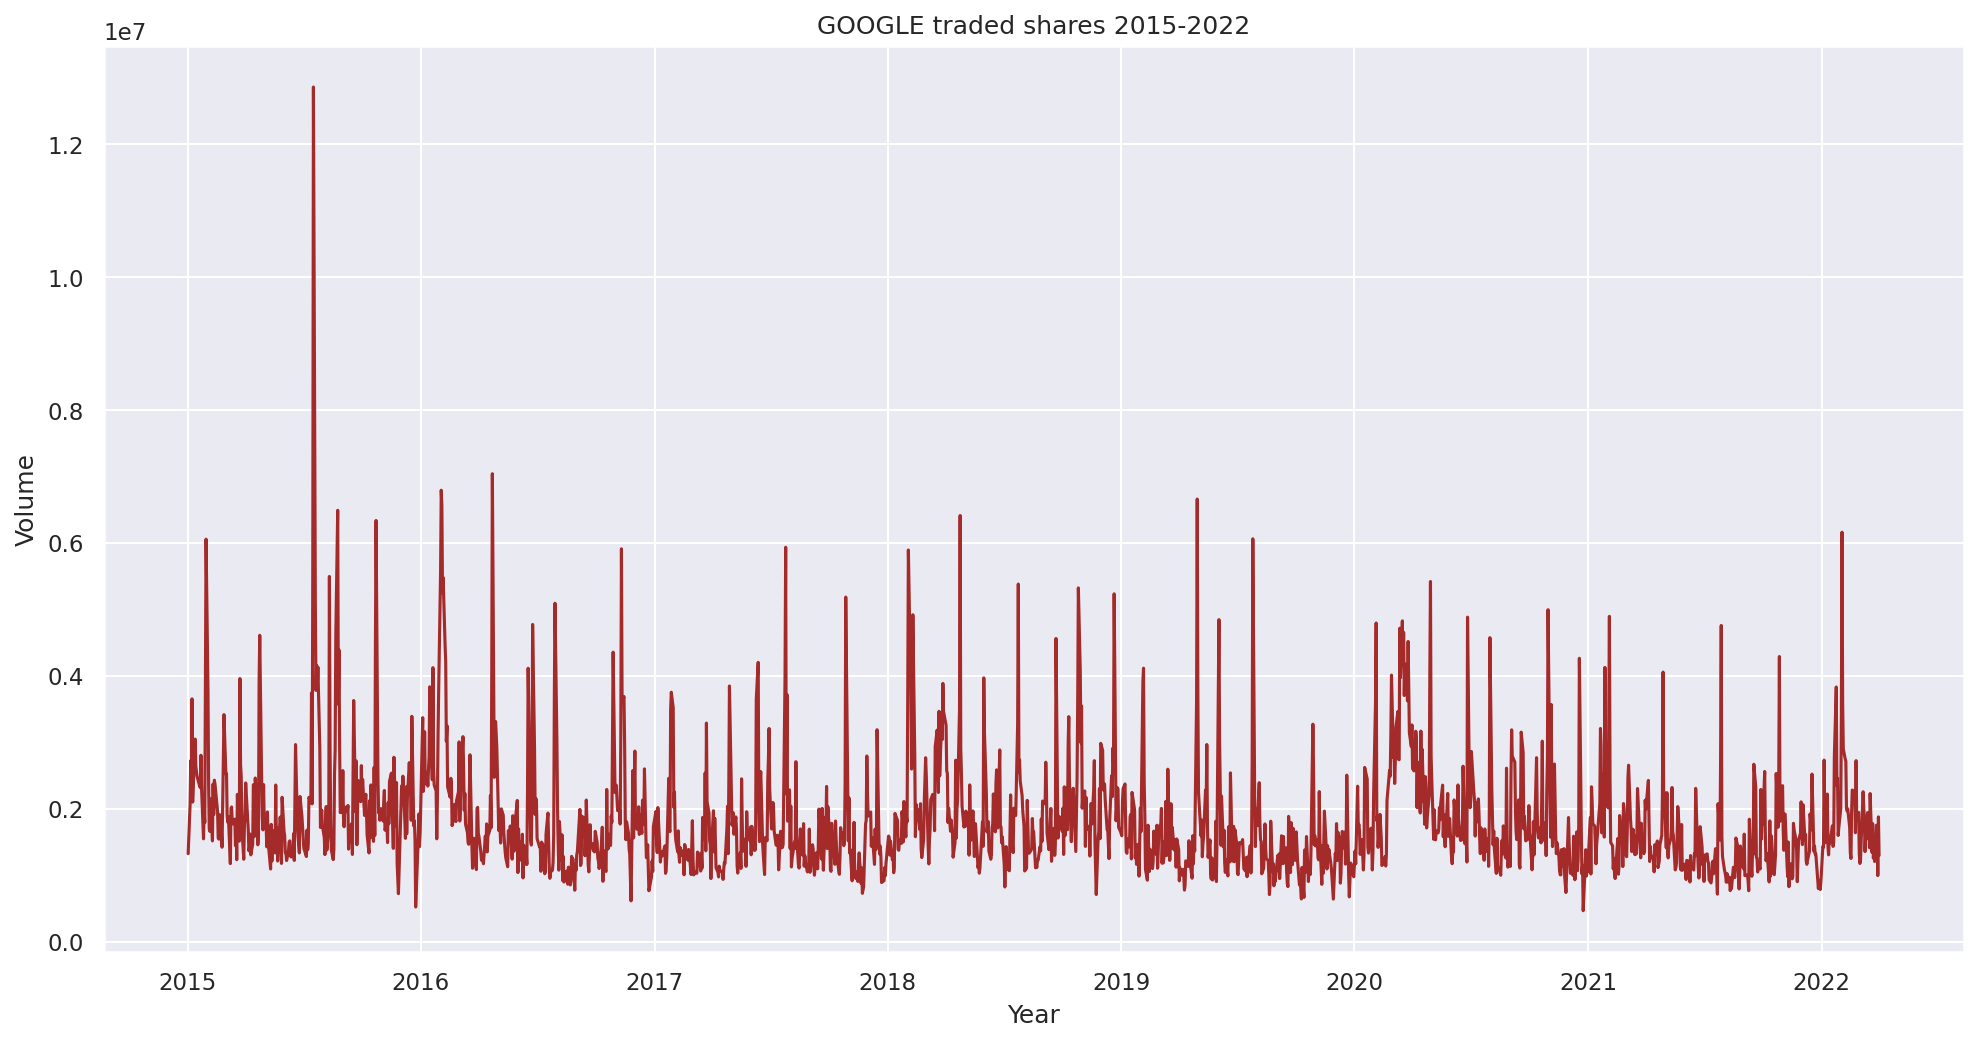

In [17]:
#Plotting GOOGLE Volume(traded shares)

close_data = data["Volume"]
plt.figure(figsize=(16,8), dpi=150)
plt.plot(close_data, color= "Brown", label="GOOGL_CLOSING PRICE")
plt.title('GOOGLE traded shares 2015-2022')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

Notice there is a high spike in volume towards the end of 2015, this means that alot of shares were traded around that time

In [18]:
#plt.figure(figsize=(18,10))
#sns.distplot(sp500['Volume'])
#plt.show()

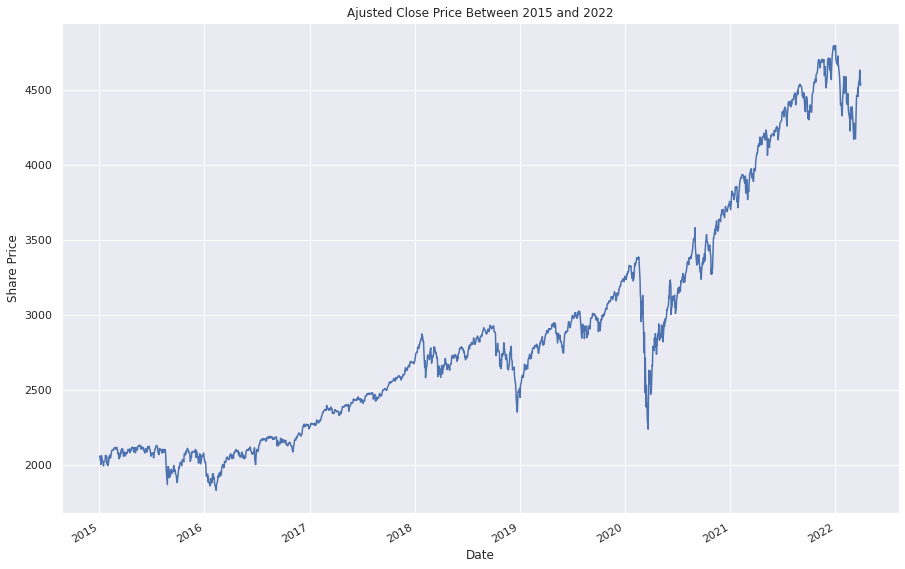

In [19]:
 #Visualizing Ajusted Close Price Between 2015 and 2022
     
sp500['Adj Close'].plot(figsize=(15,10))    #SP500(Standard & Poor's 500 Index)is a stock market index tracking the 
                                            #performance of 500 large companies listed on stock exchanges in the US
plt.ylabel('Share Price')
plt.title('Ajusted Close Price Between 2015 and 2022');

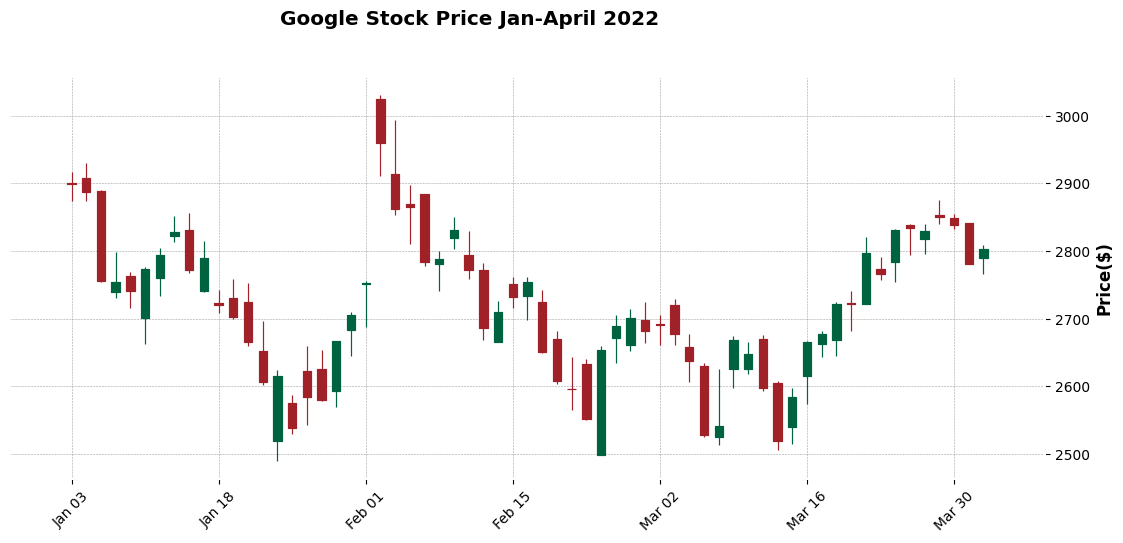

In [20]:
#Plotting a Candleplot of the last 3 months

#Deriving the relevant period
dt_range = pd.date_range(start="2022-01-02", end="2022-04-05")
google_latest = data[data.index.isin(dt_range)]

#Plotting 
mpl.plot(google_latest, type='candle', style='charles', figratio =(10, 4), title= 'Google Stock Price Jan-April 2022', ylabel = 'Price($)',)

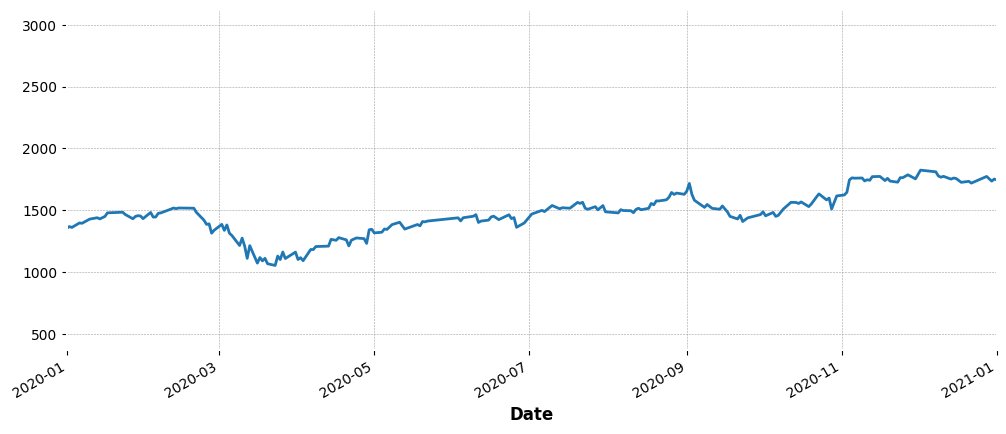

In [21]:
#closing price for last year i.e 2020
data['Close'].plot(xlim=['2020-01-01','2021-01-01'],figsize =(12,5))
plt.show()

There is a drop in the closing price in the third month of 2020 till the fifth month this was largely caused by the covid 19 pandemic that hit hard around that time

The closing price picks up from the eleventh(November) month

In [22]:
#Checking the Annual stock prices
data.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,793.960022,798.690002,787.200012,793.960022,793.960022,12858100
2016-12-31,838.500000,839.000000,829.039978,835.739990,835.739990,7039900
2017-12-31,1083.020020,1086.489990,1072.270020,1085.089966,1085.089966,5933600
2018-12-31,1289.119995,1291.439941,1263.000000,1285.500000,1285.500000,6411000
2019-12-31,1364.000000,1367.050049,1353.000000,1362.469971,1362.469971,6658900
2020-12-31,1820.540039,1843.829956,1817.000000,1824.969971,1824.969971,5417900
2021-12-31,2999.510010,3019.330078,2977.979980,2996.770020,2996.770020,4894100
2022-12-31,3025.000000,3030.929932,2910.449951,2960.000000,2960.000000,6160000


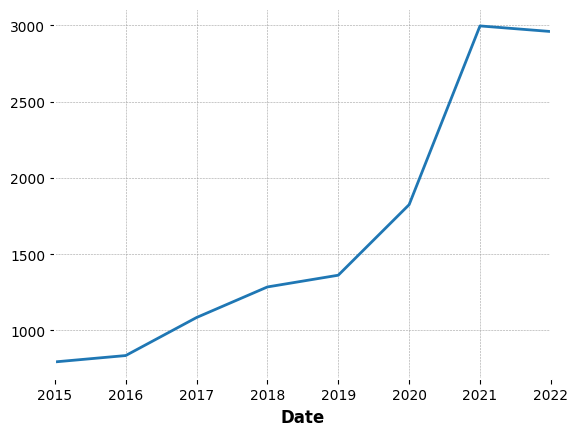

In [23]:
#maximum price at the end of every year
data.resample(rule='A').max()['Close'].plot()
plt.show()

2021 has the highest closing price among the years

In [24]:
#Quaterly stock prices
data.resample(rule='QS').max().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,582.000000,583.200012,578.229980,581.429993,581.429993,6055400
2015-04-01,580.049988,584.700012,568.349976,573.659973,573.659973,4608400
2015-07-01,699.580017,713.330017,691.619995,699.619995,699.619995,12858100
2015-10-01,793.960022,798.690002,787.200012,793.960022,793.960022,6336300
2016-01-01,800.500000,810.349976,780.599976,780.909973,780.909973,6792300


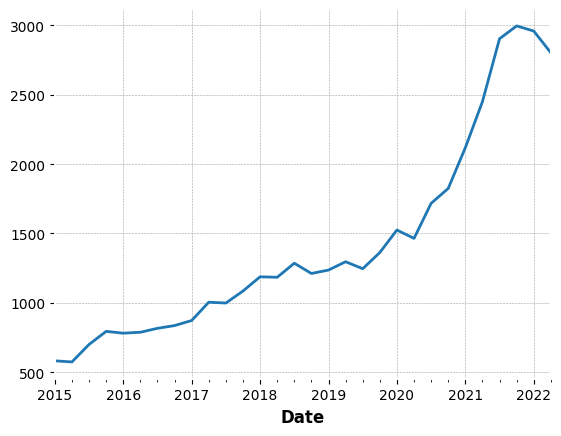

In [25]:
#Quarterly frequency
data.resample(rule='QS').max()['Close'].plot()
plt.show()

Huge jump in the google stock prices from Q1 of 2020 to 2021 Q2

### **Bivariate Analysis**

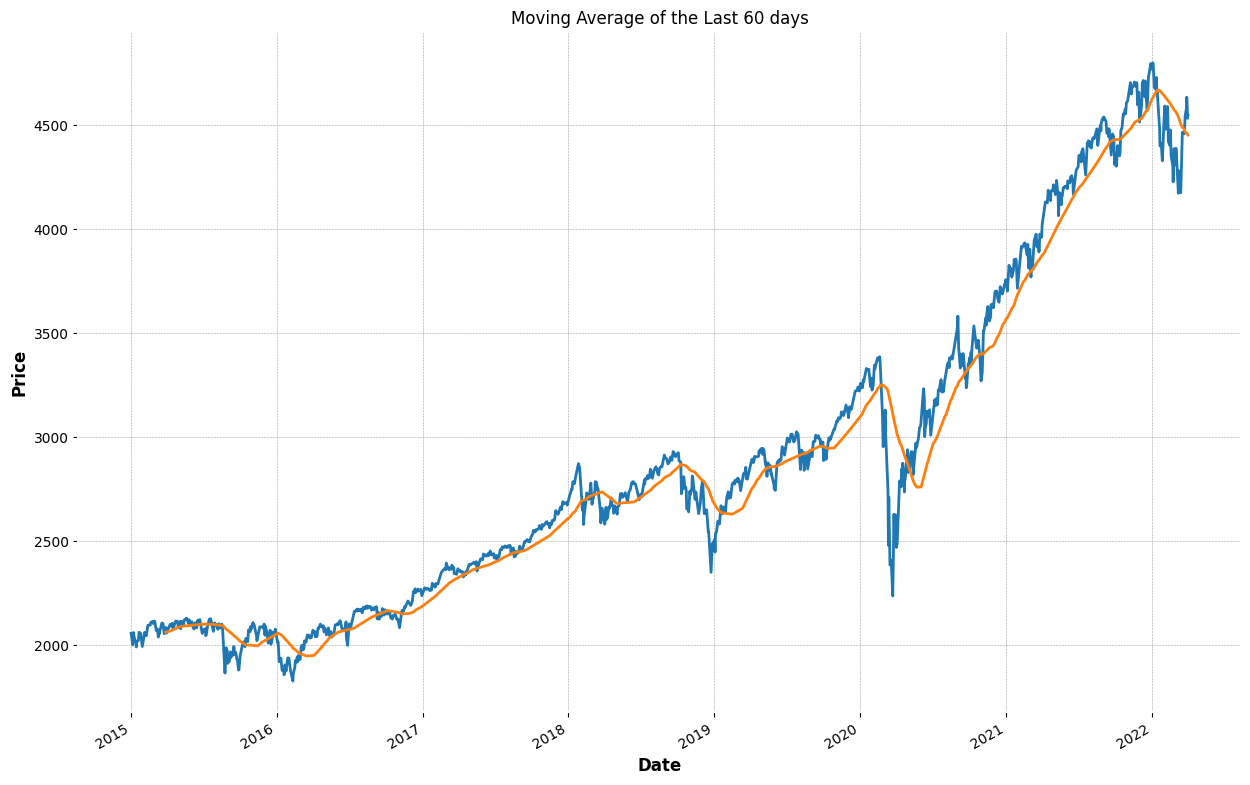

In [26]:
#Computing and visualizing the moving average of sp500 over the last 60 days
sp500['Adj Close'].plot(figsize=(15,10))                        

#Leveraging pandas' rolling.mean to compute the trends over a window of 60
sp500.rolling(window=60).mean()['Adj Close'].plot()

#Plotting the results
plt.ylabel('Price')
plt.title('Moving Average of the Last 60 days');

With a Rolling Mean, we are able to 'smoothen' out the miniature fluctuations in the dataset and to clearly decipher the trends in the data. 

Our rolling mean suggests that notwithstanding the declines in the prices over the years, the price has generally tended to have a positive upward trend between 2015 and 2022.

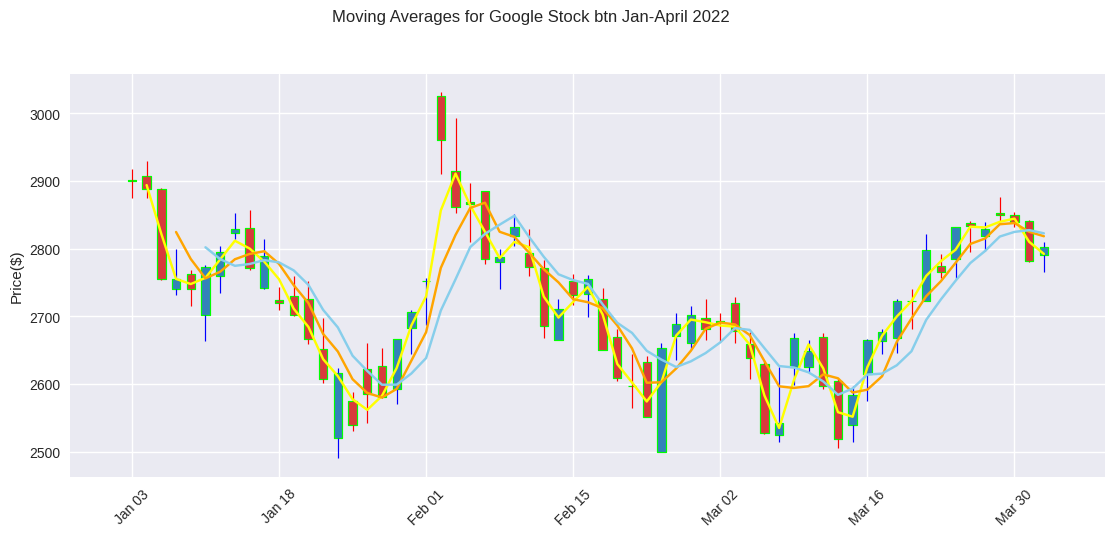

In [27]:
#Computing the moving averages over the last 4 months

#Levergaing the power of Matplotlib for finance we define the colors for the
#candlestick
make = mpl.make_marketcolors(
                            up='tab:blue',down='tab:red',
                            edge='lime',
                            wick={'up':'blue','down':'red'},
                            volume='lawngreen',
                           )

#Defining the style to use in the plot using the make_mpf_style method and the base_mpl_style parameter
sborn = mpl.make_mpf_style(base_mpl_style="seaborn", marketcolors=make, mavcolors=["yellow","orange","skyblue"])


#Plotting 
mpl.plot(google_latest, type='candle', style=sborn, title= 'Moving Averages for Google Stock btn Jan-April 2022', ylabel = 'Price($)', figratio =(10,4), mav= (2, 4, 6))


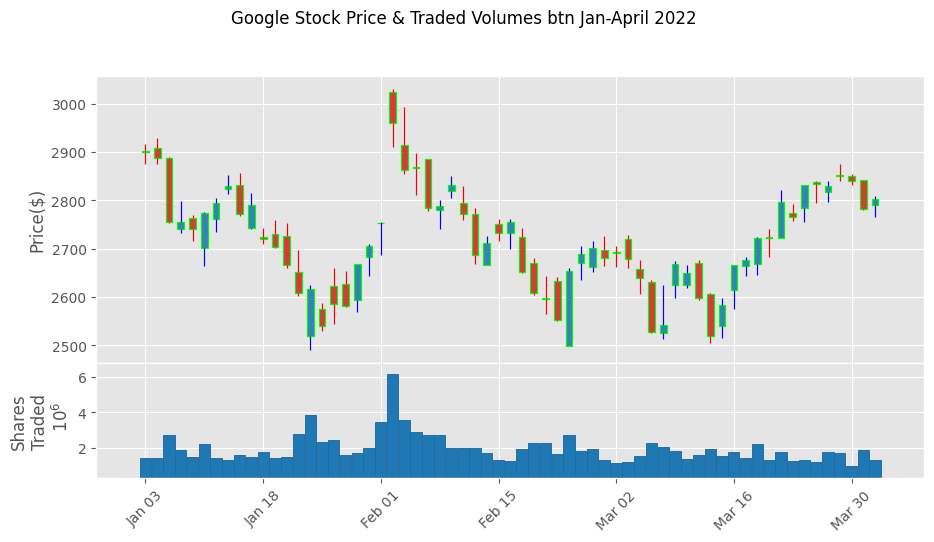

In [28]:
#Defining the styling colors
col_collect = mpl.make_marketcolors(up='tab:blue',down='tab:red',
                            edge='lime',
                            wick={'up':'blue','down':'red'},
                            volume='tab:blue')
#Style for the plot
style_plot = mpl.make_mpf_style(base_mpl_style ="ggplot", marketcolors = col_collect)

#Specifying Volume is True as the plot will include volume of shares traded

mpl.plot(google_latest, type='candle', style=style_plot, volume = True, ylabel_lower= 'Shares\nTraded', title= 'Google Stock Price & Traded Volumes btn Jan-April 2022', ylabel = 'Price($)', figratio =(8,4))

In [29]:
#Computing the Returns on the SP500 using log
%time sp500['Return'] = np.log(sp500['Close']/ sp500['Close'].shift(1))

CPU times: user 4.57 ms, sys: 0 ns, total: 4.57 ms
Wall time: 4.58 ms


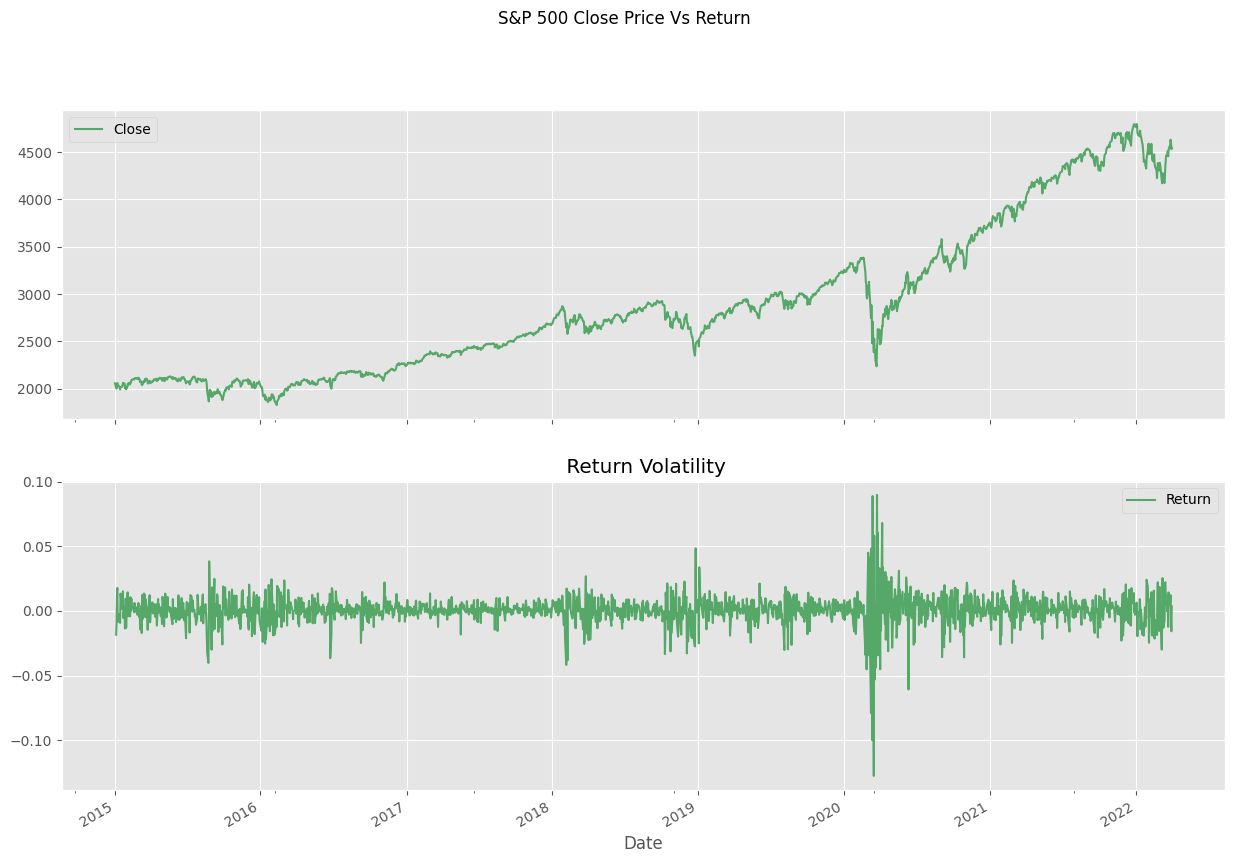

In [30]:
sp500[['Close', 'Return']].plot(subplots=True, style='g', figsize=(15, 10), title='S&P 500 Close Price Vs Return')
plt.title(' Return Volatility');

We deduce two stylized facts of equity returns from the plot above:

1. Volatility Clustering

The movement in the graph overtime suggests that volatility is not constant. Generally, between 2015 and 2020 volatility was stable though in 2015 there were
spikes possibly driven by China's devaluation of the Yuan and the fall in the 
oil prices in 2015 and in 2019 at the peak of the US-China trade wars, Italian elections and Donald Trumps threat of sacking the chairperson of the FED.

In 2020, we see the highest levels of volatility possibly driven by Covid and the significant drop in oil prices due to an oversupply of oil in the markets.


2. Leverage effect

It is clear that there is a negative correlation between volatility and market returns. When the markets prices are low, the stocks are at the highest volatility and vice versa.

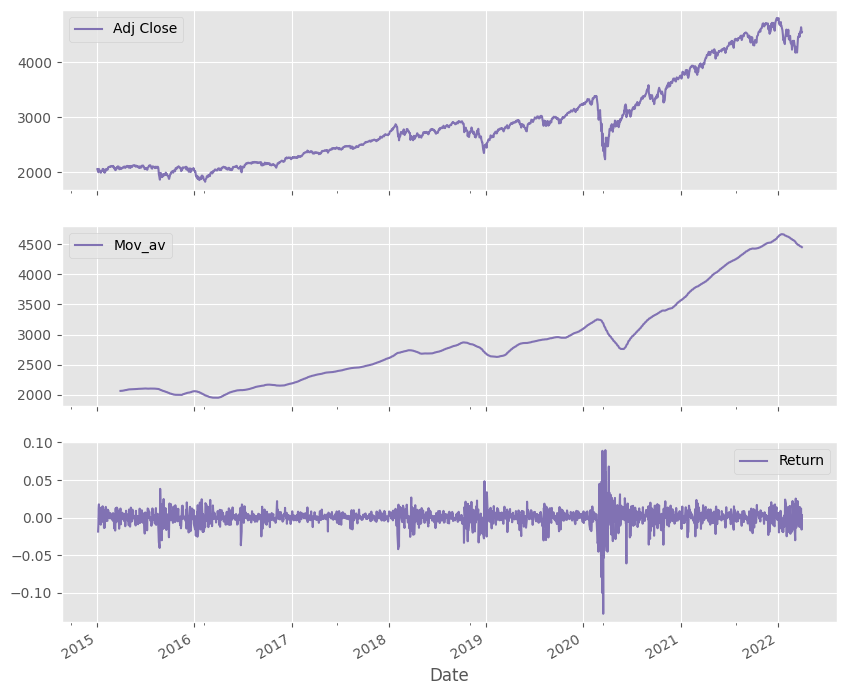

In [31]:
#moving average, return and adj close using the sp500 index
sp500["Mov_av"] = sp500.rolling(window=60).mean()['Adj Close']


sp500[['Adj Close', 'Mov_av', 'Return' ]].plot(subplots = True, style='m', figsize=(10, 9));

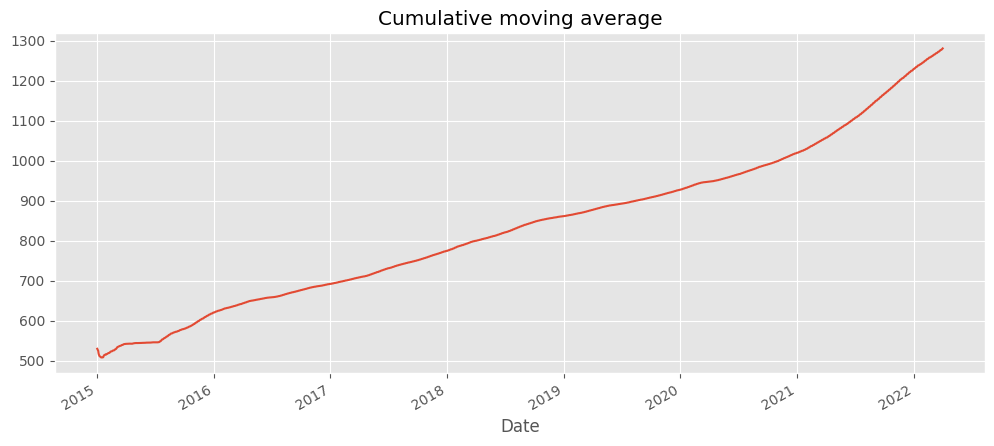

In [32]:
#cumulative moving average
data['Close'].expanding().mean().plot(figsize=(12,5))
plt.title('Cumulative moving average')
plt.show()

Upward trend from 2016 with a slight drop in 2020 as a result of Covid-19

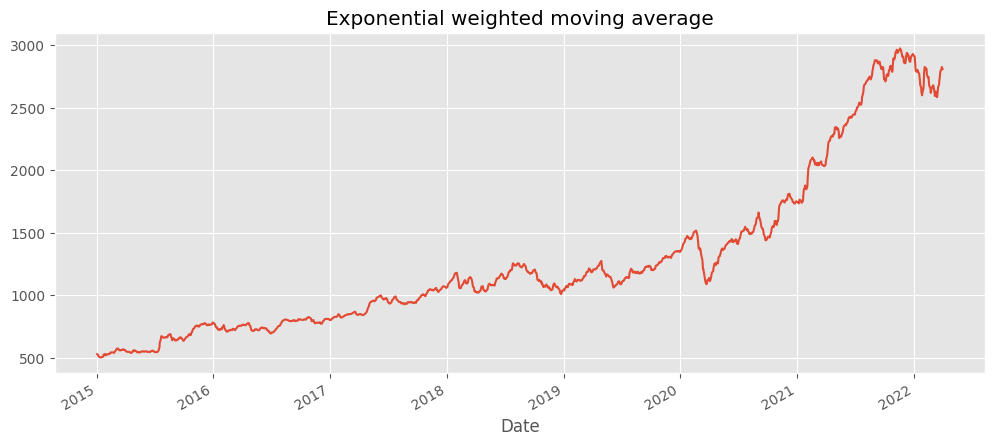

In [33]:
#Exponential weighted moving average
#We provide weights to the recent data
#To prevent lags
data['Close'].ewm(span=5).mean().plot(figsize=(12,5))
plt.title('Exponential weighted moving average')
plt.show()

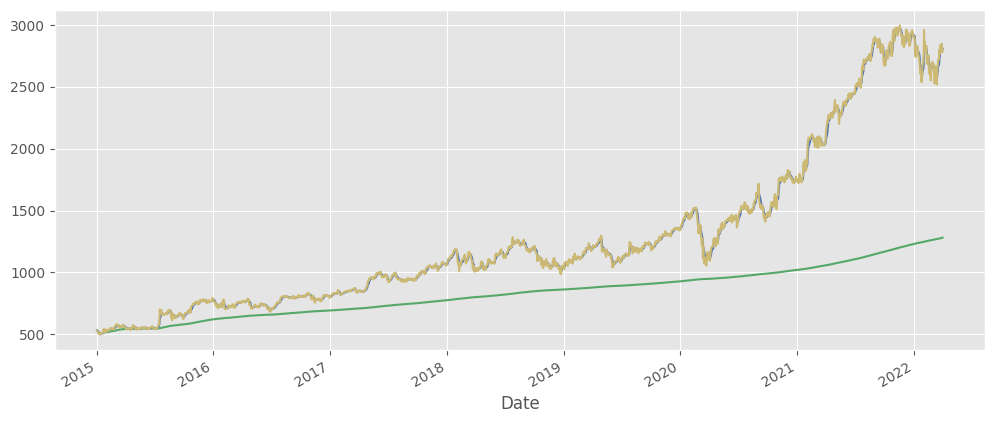

In [34]:
#comparing the exponential moving average and
data['Close'].expanding().mean().plot(figsize=(12,5),c = 'G')
data['Close'].ewm(span=5).mean().plot(figsize=(12,5),c = 'B')
data['Close'].plot(figsize =(12,5),c = 'Y')
plt.show()

In [35]:
df1 = data

df1['ewma-12'] = df1['Adj Close'].ewm(span=12).mean()

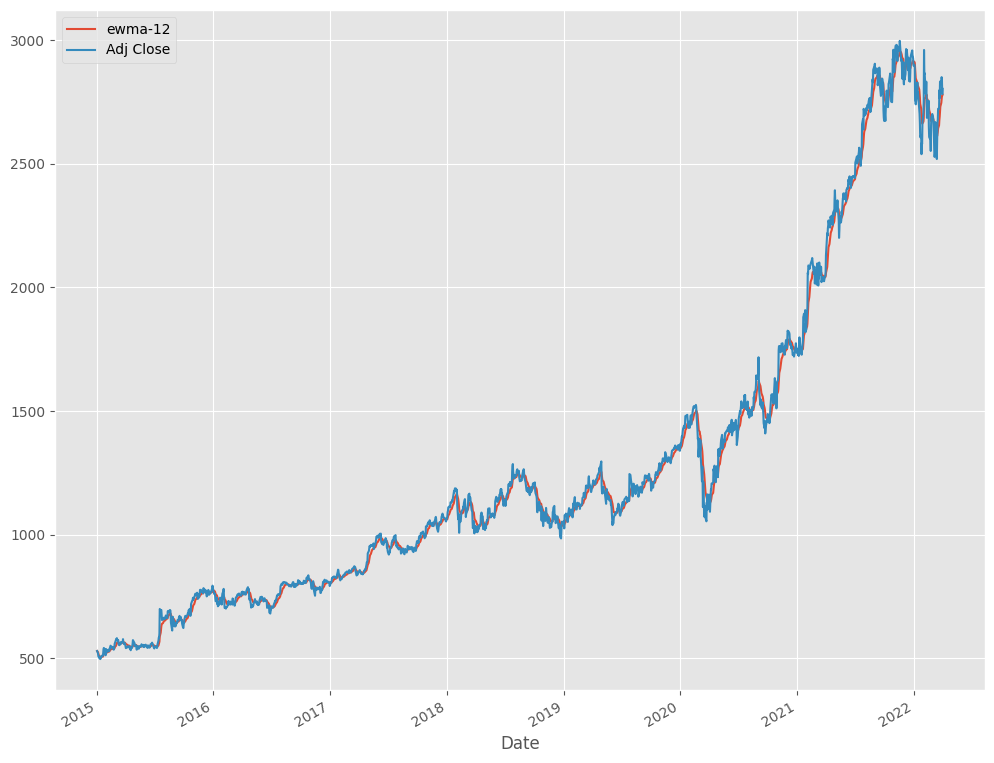

In [36]:
df1[['ewma-12', 'Adj Close']].plot(figsize=(12, 10));

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


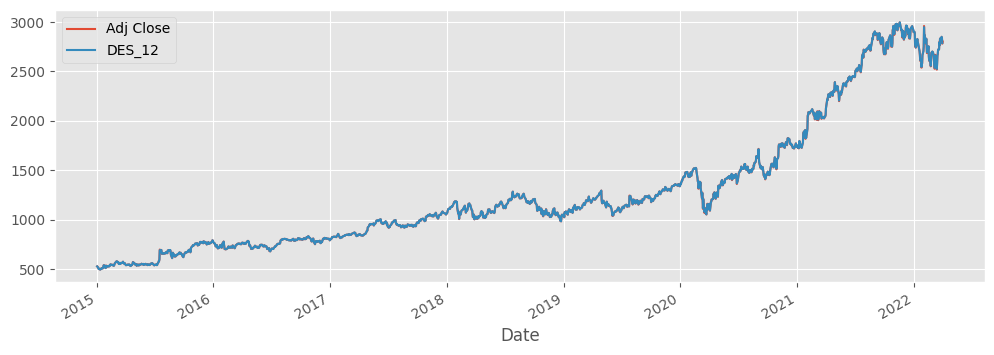

In [37]:
#HoltWinter 

df1['DES_12'] = ExponentialSmoothing(df1['Adj Close'], trend= 'add').fit().fittedvalues.shift(-1)

df1[['Adj Close', 'DES_12']].plot(figsize=(12,4))

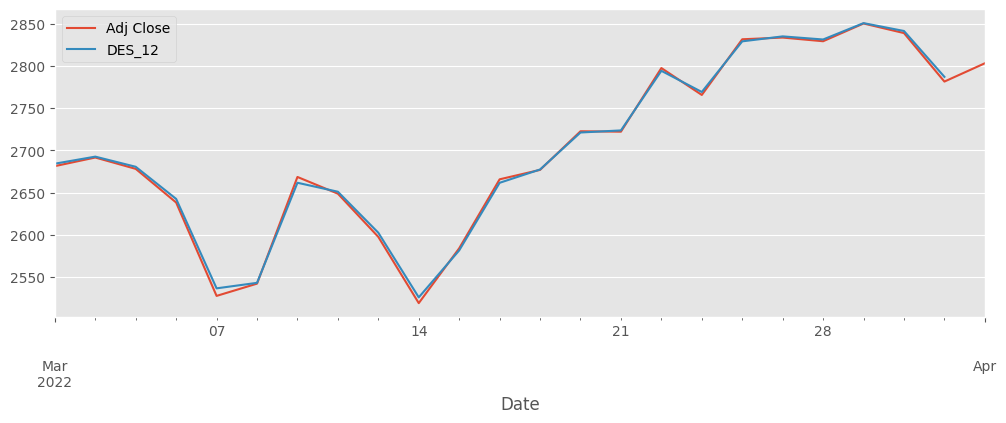

In [38]:
#Zooming in on the last 2 years
df1[['Adj Close', 'DES_12']].iloc[-24:].plot(figsize=(12,4));

In [39]:
df1['Mult'] = ExponentialSmoothing(df1['Adj Close'], trend= 'mul', seasonal = 'mul', seasonal_periods= 12 ).fit().fittedvalues.shift(-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


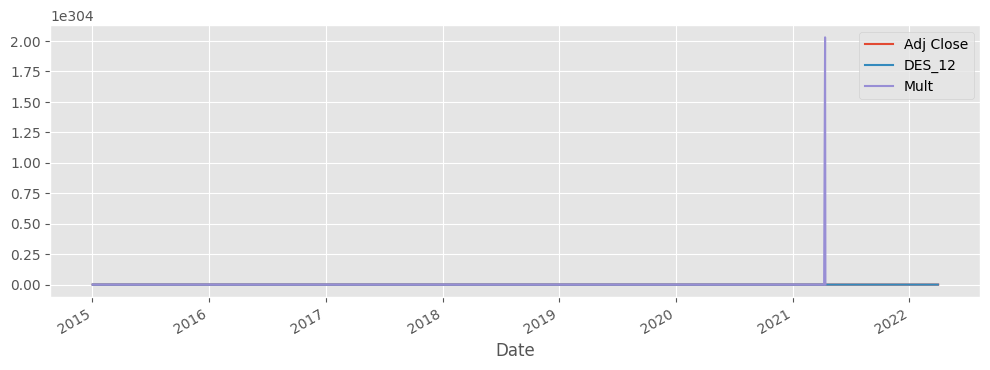

In [40]:
df1[['Adj Close', 'DES_12', 'Mult']].plot(figsize=(12,4));

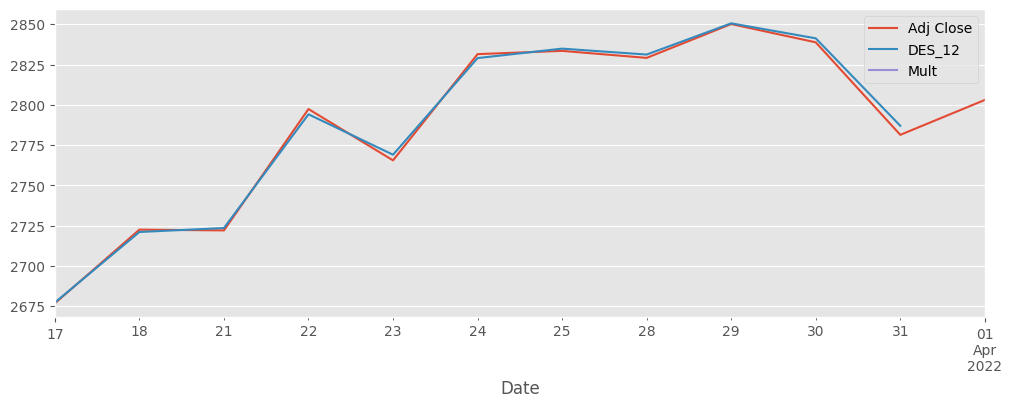

In [41]:

df1[['Adj Close', 'DES_12', 'Mult']].iloc[-12:].plot(figsize=(12,4))

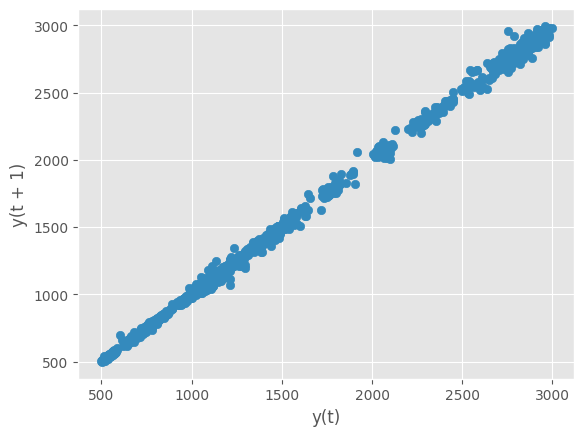

In [42]:
#Lag Plots

lag_plot(data['Adj Close']);

There is evidence of very high autocorrelation in the dataset

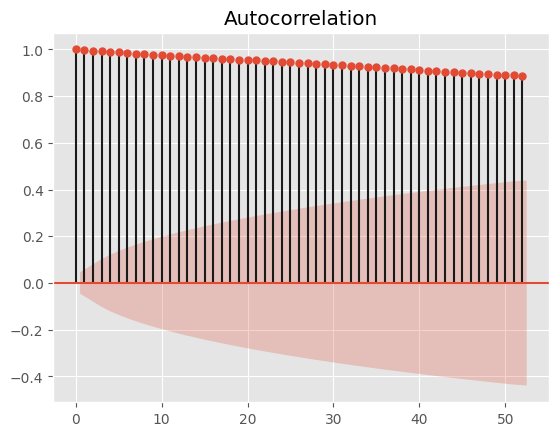

In [43]:
plot_acf(data['Adj Close'], lags=52);

In [44]:
#data['Open:60 days rolling']=data['Open'].rolling(60).mean()
#data[['Open','Open:60 days rolling']].plot(figsize=(12,5))

# **MODEL DEVELOPMENT**

In this section, we will focus on building model that accurately forecast the stock prices. 



**Data Preparation**

One key assumption we make when working with Time Series data is that the data is stationary i.e., that for each lag the mean, variance and autocorrelation of the data do not vary across time. 

What we would like to avoid is that the data shows a strong trend towards a particular direction (**seasonality**). 

Stationary Time Series data make the process of model development efficient. Before attempting any model development, we will satisfy ourselves that our data is stationary. Should the data not be stationary, we will use established methods to make it stationary.

We use the Augmented Dick Fuller Test to check for stationality. 

The basic objective of the test is to test the null hypothesis that  =1

yt =  y t 1 + u t

against the one sided alternative 
 <1. 

Thus, Our Hypothesis is:

H
0 : series contains a unit root

and 

H 1 : series is stationary

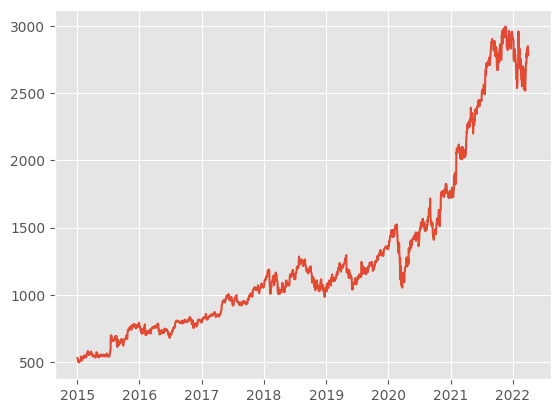

In [45]:
station_check = data['Adj Close']

plt.plot(station_check);

In [46]:
X = station_check.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

#Checking the Results 
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: 1.087950
p-value: 0.995112
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


We have established that the data is non-stationary. We therefore need to transform it to a stationary form otherwise we will have spurious results in the implementation of the model.

In [47]:
df = data

In [48]:
#transforming the data into stationary
df['trans_1'] = df['Adj Close'].diff(periods=1)

df['trans_2'] = df['Adj Close'].diff(periods=2)

df['trans_3'] = df['Adj Close'].diff(periods=3)

df.head()

,Open,High,Low,Close,Adj Close,Volume,ewma-12,DES_12,Mult,trans_1,trans_2,trans_3
Date,,,,,,,,,,,,
2015-01-02,532.599976,535.799988,527.880005,529.549988,529.549988,1324000,529.549988,529.472067,521.365094,NaN,NaN,NaN
2015-01-05,527.150024,527.989990,517.750000,519.460022,519.460022,2059100,524.084590,520.114429,508.014136,-10.089966,NaN,NaN
2015-01-06,520.500000,521.210022,505.549988,506.640015,506.640015,2722800,517.275968,507.507188,505.899367,-12.820007,-22.909973,NaN
2015-01-07,510.950012,511.489990,503.649994,505.149994,505.149994,2345900,513.448272,505.274854,507.170619,-1.490021,-14.310028,-24.399994
2015-01-08,501.510010,507.500000,495.019989,506.910004,506.910004,3652700,511.671848,506.771507,500.694681,1.760010,0.269989,-12.550018


In [49]:
#Checking whether we have achieved our goal in the first order of difference

df_clean = df['trans_1'].dropna()
X = df_clean.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

#Checking the Results 
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")


ADF Statistic: -9.788236
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Ho - Time Series is Stationary


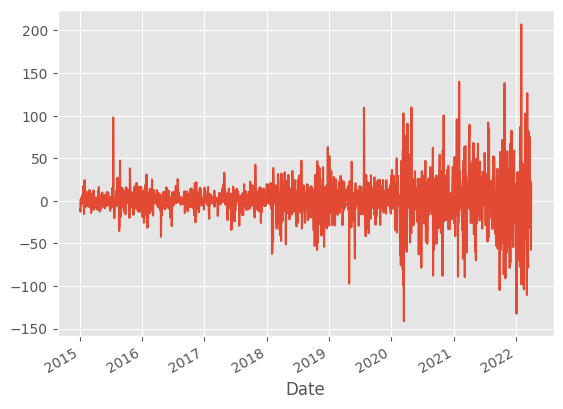

In [50]:
#visualization of the stationary dataframe
df_clean.plot()

We have succeeded in making the data stationary.

## Univariate Time series 

### stock Market

Here we will be predicting the market stock price 

In [51]:
sp500 = yf.download('^GSPC',
start='2015-01-01',
end='2021-08-01',
progress=False, actions='inline')

In [52]:
#Data Preparation and Scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(sp500['Adj Close'].values.reshape(-1,1))

prediction_days = 60


In [53]:
#Instantiating Empty X_train and Y_train
X_train = []
y_train = []



for x in range(prediction_days, len(scaled_data)):
  X_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [54]:
#Instantiate Sequential Model
model = Sequential()

#Adding Layer One
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#Dropping some features
model.add(Dropout(0.2))

#Adding Layer two
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

#Adding Layer three
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#Adding the Output Layer
model.add(Dense(units=1))

In [55]:
#Fitting the Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 35, batch_size = 32)

Epoch 1/35
50/50 [==============================] - 21s 47ms/step - loss: 0.0146
Epoch 2/35
50/50 [==============================] - 3s 52ms/step - loss: 0.0033
Epoch 3/35
50/50 [==============================] - 2s 50ms/step - loss: 0.0032
Epoch 4/35
50/50 [==============================] - 2s 46ms/step - loss: 0.0026
Epoch 5/35
50/50 [==============================] - 2s 47ms/step - loss: 0.0024
Epoch 6/35
50/50 [==============================] - 2s 46ms/step - loss: 0.0027
Epoch 7/35
50/50 [==============================] - 2s 44ms/step - loss: 0.0024
Epoch 8/35
50/50 [==============================] - 2s 44ms/step - loss: 0.0020
Epoch 9/35
50/50 [==============================] - 2s 44ms/step - loss: 0.0020
Epoch 10/35
50/50 [==============================] - 2s 44ms/step - loss: 0.0020
Epoch 11/35
50/50 [==============================] - 2s 43ms/step - loss: 0.0021
Epoch 12/35
50/50 [==============================] - 2s 43ms/step - loss: 0.0020
Epoch 13/35
50/50 [=================

In [56]:
#Deriving Test Data
test_data = yf.download('^GSPC',
start='2021-08-08',
end='2022-04-12',
progress=False, actions='inline')

In [57]:
actual_prices = test_data['Adj Close'].values


all_data = pd.concat((sp500['Adj Close'], test_data['Adj Close']), axis=0)

model_inputs = all_data[len(all_data)- len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)

model_inputs = scaler.transform(model_inputs)

In [58]:
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [59]:
predicted_prices = model.predict(X_test)

#Reverse scaling the prices

predicted_prices = scaler.inverse_transform(predicted_prices)


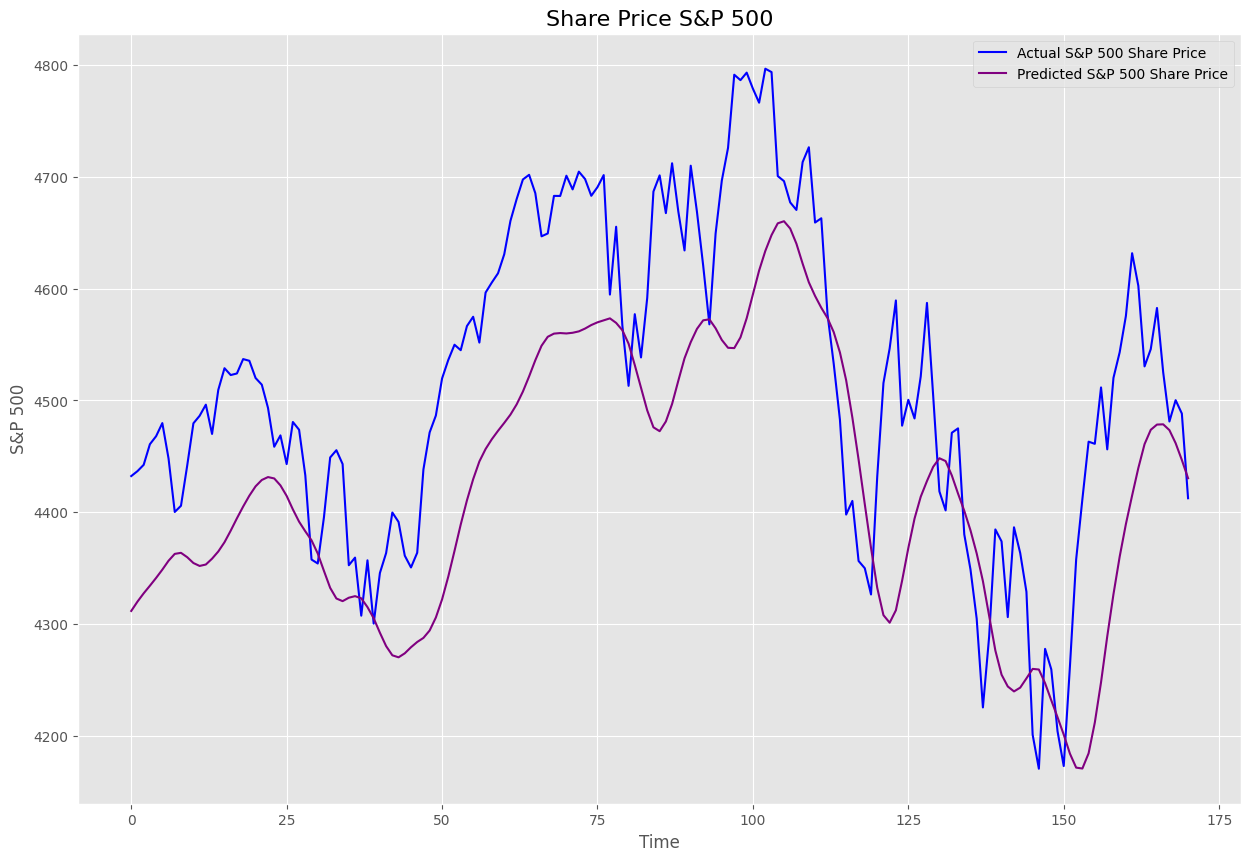

In [60]:
#Plotting the Predictions on Test Data
plt.figure(figsize=(15,10))
plt.plot(actual_prices, color= 'blue', label = 'Actual S&P 500 Share Price')
plt.plot(predicted_prices, color='purple', label = 'Predicted S&P 500 Share Price')
plt.title('Share Price S&P 500', fontsize=16)
plt.xlabel('Time')
plt.ylabel('S&P 500')
plt.legend();


In [61]:
rmse = np.sqrt(np.mean(predicted_prices -actual_prices)**2)
rmse

95.90214386878655

### LSTM

We will focus on the close(closing price) variable for our prediction

In [62]:
df1=data.reset_index()['Close']

In [63]:
df1

0        529.549988
1        519.460022
2        506.640015
3        505.149994
4        506.910004
           ...     
1821    2829.110107
1822    2850.110107
1823    2838.770020
1824    2781.350098
1825    2803.010010
Name: Close, Length: 1826, dtype: float64

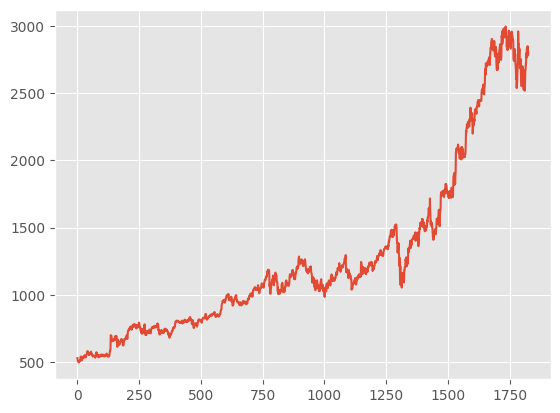

In [64]:
plt.plot(df1)
plt.show()

In [65]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [66]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [67]:
#the size of train and test 
training_size,test_size


(1186, 640)

In [68]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [69]:
#Extra pollation
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [70]:
#shape of x train and y train
print(X_train.shape), print(y_train.shape)

(1085, 100)
(1085,)


(None, None)

In [71]:
#shape of x test and y test
print(X_test.shape), print(ytest.shape)

(539, 100)
(539,)


(None, None)

In [72]:
# reshape input to be [samples, time steps, features] which is required for LSTM
#reshape to 3D
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [73]:
#we used the optimizer Adam because of its high performance and fast convergence compared to other alternative optimizer 
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1), activation = 'relu')) #activation relu
model.add(LSTM(100,return_sequences=True)) #50 before
model.add(LSTM(100))
model.add(Dense(1))  #ouput
model.compile(loss='mean_squared_error',optimizer='adam')

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 100)          40800     
                                                                 
 lstm_4 (LSTM)               (None, 100, 100)          80400     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 11s 342ms/step - loss: 0.0067 - val_loss: 0.0325
Epoch 2/100
17/17 [==============================] - 5s 276ms/step - loss: 7.9477e-04 - val_loss: 0.0014
Epoch 3/100
17/17 [==============================] - 5s 276ms/step - loss: 2.5266e-04 - val_loss: 0.0044
Epoch 4/100
17/17 [==============================] - 5s 269ms/step - loss: 2.1940e-04 - val_loss: 0.0025
Epoch 5/100
17/17 [==============================] - 5s 288ms/step - loss: 2.3096e-04 - val_loss: 0.0047
Epoch 6/100
17/17 [==============================] - 6s 337ms/step - loss: 2.1141e-04 - val_loss: 0.0026
Epoch 7/100
17/17 [==============================] - 5s 278ms/step - loss: 1.9302e-04 - val_loss: 0.0033
Epoch 8/100
17/17 [==============================] - 5s 269ms/step - loss: 1.9085e-04 - val_loss: 0.0026
Epoch 9/100
17/17 [==============================] - 5s 281ms/step - loss: 1.8530e-04 - val_loss: 0.0033
Epoch 10/100
17/17 [==============================] - 6s 3

In [76]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [77]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [78]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

956.9941719826062

In [79]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2002.0075261351587

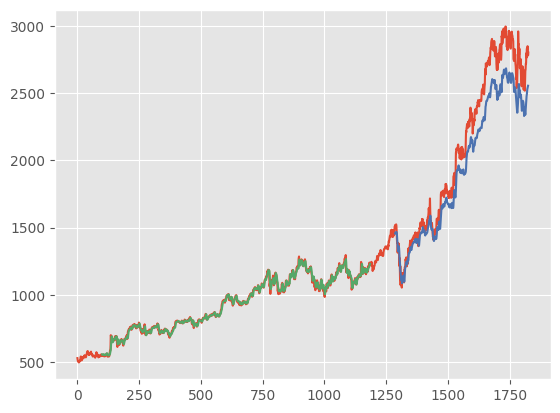

In [80]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot, c = 'G')
plt.plot(testPredictPlot, c = 'B')
plt.show()

The green part represents the train predict data

the blue part repesents the test predict data

In [81]:
len(test_data)

640

In [82]:
#getting an input of length 100 for prediction
x_input=test_data[540:].reshape(1,-1)
x_input.shape

(1, 100)

In [83]:
#convert into a list and taking all the values
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [84]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8149096]
101
1 day input [0.96843638 0.96742024 0.99071494 0.98890672 0.98429818 0.98566631
 1.         0.99270316 0.97170473 0.96754418 0.9702485  0.93874885
 0.96553204 0.9364646  0.92969585 0.94501364 0.93729673 0.94652583
 0.97944557 0.98678245 0.98239796 0.9853023  0.96790028 0.95254244
 0.97281687 0.95684695 0.93508446 0.93414031 0.94906606 0.97260883
 0.97662131 0.98454215 0.97478506 0.97452908 0.97089262 0.96010338
 0.96121953 0.95648294 0.9034808  0.90326075 0.89741613 0.91063758
 0.9191706  0.93272823 0.90997755 0.91712642 0.88926313 0.88221036
 0.86773661 0.84408592 0.84770636 0.81675072 0.83513683 0.8333127
 0.8680847  0.88370653 0.90243263 0.98529029 0.94600575 0.94762996
 0.91489013 0.9164743  0.93402037 0.91024154 0.87553752 0.88548672
 0.89414768 0.90318477 0.86158795 0.84449798 0.83978142 0.82197535
 0.86280411 0.8769537  0.88173423 0.87376934 0.8778498  0.8724732
 0.8565273  0.81229825 0.81810693 0.86863672 0.86071187 0.84023743
 0.80887783 0.83485682 0.86752067 0.

In [85]:
#we took 100 days from the previous day in the test data
#we take the next 30 days that we want to predict
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [86]:
len(df1)

1826

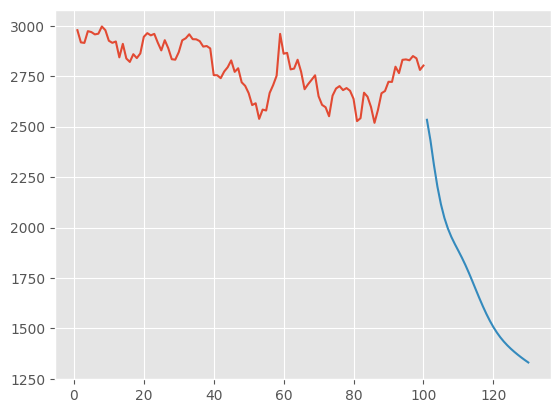

In [87]:
#Taking the previous 100 data from our dataframe
#predicted data is obtaine from the pre calculated list(lst_output)
plt.plot(day_new,scaler.inverse_transform(df1[1726:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

Blue part represent the next predicted 30 days

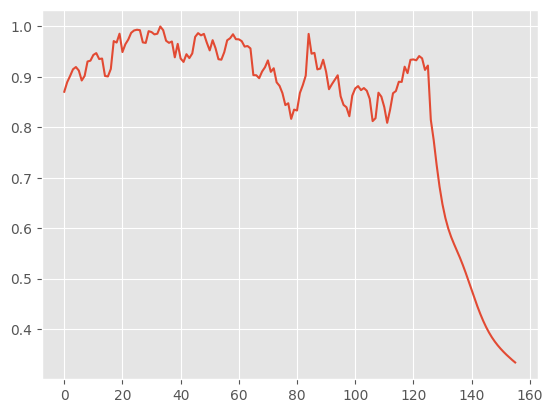

In [88]:
#Combining the predicteed curve for complete output
#Combine df1 and the list output inside df3
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1700:])
plt.show()

In [89]:
#Transforming back df3
df3=scaler.inverse_transform(df3).tolist()

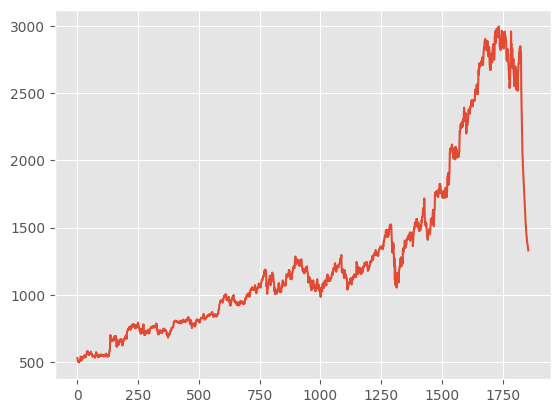

In [90]:
#plotting the curve with the next 30 days predicted
plt.plot(df3)
plt.show()

Our model predicts an increase in the closing price for google stock market in the coming 30 days

## Challenging the Solution

### Ltsm 3

In [91]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1735

In [92]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(dataset).reshape(-1,1))

scaled_data


array([[0.0129975 ],
       [0.00896105],
       [0.00383245],
       ...,
       [0.93679267],
       [0.91382204],
       [0.92248701]])

In [93]:
import numpy

#creating timestep

def create_dataset(dataset, timestep=1):
  dataX, dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX), numpy.array(dataY)

In [94]:
time_step=60
x_train, y_train=create_dataset(train_data, time_step)
x_test, y_test=create_dataset(test_data, time_step)



In [95]:
print("Train dataset","\n",x_train.shape),print(y_train.shape)
print("******")

Train dataset 
 (1125, 60)
(1125,)
******


In [96]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [97]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(25, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(25, return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1125/1125 [==============================] - 29s 23ms/step - loss: 5.5562e-04
Epoch 2/5
1125/1125 [==============================] - 26s 23ms/step - loss: 2.0563e-04
Epoch 3/5
1125/1125 [==============================] - 26s 23ms/step - loss: 1.5513e-04
Epoch 4/5
1125/1125 [==============================] - 26s 23ms/step - loss: 1.2184e-04
Epoch 5/5
1125/1125 [==============================] - 26s 23ms/step - loss: 9.3726e-05


In [98]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 25)            2700      
                                                                 
 lstm_7 (LSTM)               (None, 25)                5100      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 7,826
Trainable params: 7,826
Non-trainable params: 0
_________________________________________________________________


## Predicting and testing our model

In [99]:
train_predict=model.predict(x_train)



In [100]:
test_predict=model.predict(x_test)


In [101]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train,train_predict))

0.010413408045572092

In [102]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.05639108850630359

Both our rmses are close to each other and close to 0 so our model is doing good

In [103]:
from sklearn.metrics import r2_score
r2_score(y_test,test_predict)


0.9440340810865657

Our accuracy score is 99% which is good

#### Checking for overfitting


In [104]:
overfit=np.subtract(test_predict,y_test)

pd.DataFrame(overfit).describe()

overfit.mean()

-0.0456182310328285

Our value is close to 0 so it doesnt iverfit

---



---



# Forecasting Timeseries Data Using Facebook FbProphet

In [105]:
df = data['Close']

In [106]:
df.head()

Date
2015-01-02    529.549988
2015-01-05    519.460022
2015-01-06    506.640015
2015-01-07    505.149994
2015-01-08    506.910004
Name: Close, dtype: float64

Fbprophet requires us to change the variable names to 'ds' and 'y'

In [107]:
df = df.to_frame().reset_index()

In [108]:
df.head()

,Date,Close
0,2015-01-02,529.549988
1,2015-01-05,519.460022
2,2015-01-06,506.640015
3,2015-01-07,505.149994
4,2015-01-08,506.910004


In [109]:
df.columns=["ds","y"]
df.head()
# ds represents the Date column, and y is the target variable which in our case is the close variable

,ds,y
0,2015-01-02,529.549988
1,2015-01-05,519.460022
2,2015-01-06,506.640015
3,2015-01-07,505.149994
4,2015-01-08,506.910004


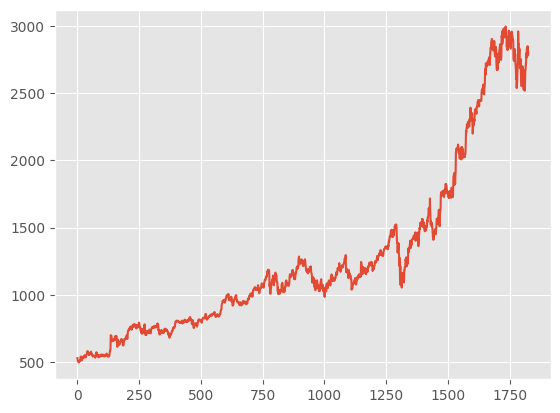

In [110]:
df['y'].plot()
plt.show()

In [111]:
### intiialize the Model
model=Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [112]:
#takes yearly seasonality
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [113]:
#### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [114]:
df.tail()

,ds,y
1821,2022-03-28,2829.110107
1822,2022-03-29,2850.110107
1823,2022-03-30,2838.770020
1824,2022-03-31,2781.350098
1825,2022-04-01,2803.010010


In [115]:
future_dates.tail()

,ds
2186,2023-03-28
2187,2023-03-29
2188,2023-03-30
2189,2023-03-31
2190,2023-04-01


In [116]:
### Prediction
prediction=model.predict(future_dates)

In [117]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,525.133035,379.358351,619.524066,525.133035,525.133035,-17.076891,-17.076891,-17.076891,0.005496,0.005496,0.005496,-17.082387,-17.082387,-17.082387,0.0,0.0,0.0,508.056144
1,2015-01-05,526.703980,381.510581,624.056284,526.703980,526.703980,-24.780534,-24.780534,-24.780534,-2.663927,-2.663927,-2.663927,-22.116608,-22.116608,-22.116608,0.0,0.0,0.0,501.923446
2,2015-01-06,527.227628,386.920118,613.679225,527.227628,527.227628,-25.099546,-25.099546,-25.099546,-1.525243,-1.525243,-1.525243,-23.574303,-23.574303,-23.574303,0.0,0.0,0.0,502.128083
3,2015-01-07,527.751277,381.680769,627.526566,527.751277,527.751277,-24.081048,-24.081048,-24.081048,0.802036,0.802036,0.802036,-24.883084,-24.883084,-24.883084,0.0,0.0,0.0,503.670229
4,2015-01-08,528.274925,389.508335,618.314367,528.274925,528.274925,-25.199285,-25.199285,-25.199285,0.824081,0.824081,0.824081,-26.023366,-26.023366,-26.023366,0.0,0.0,0.0,503.075641


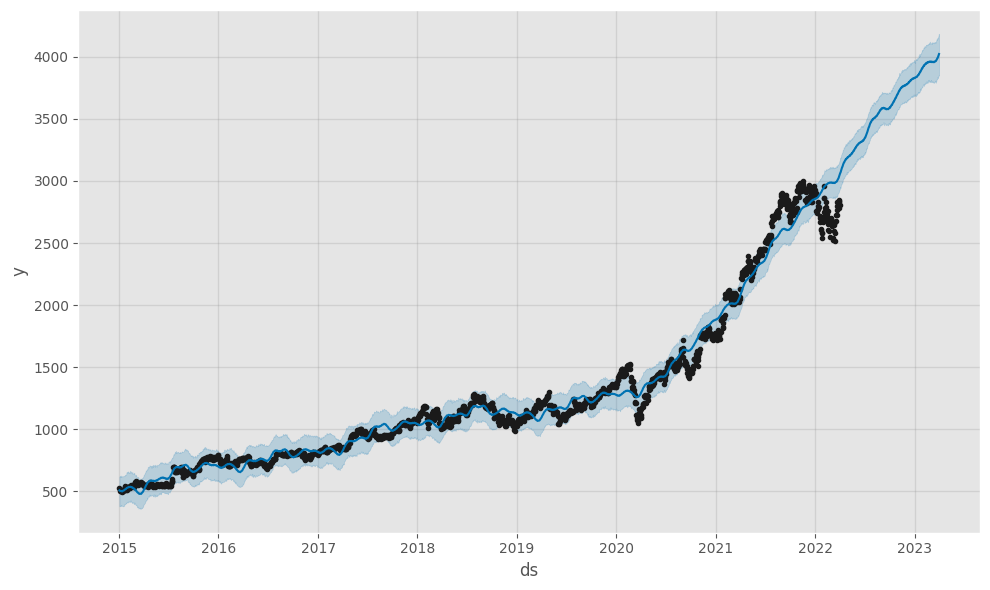

In [118]:
#### plot the predicted projection
model.plot(prediction);

dotted points is the real data

blue line is the projection

light blue space is the trend

The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

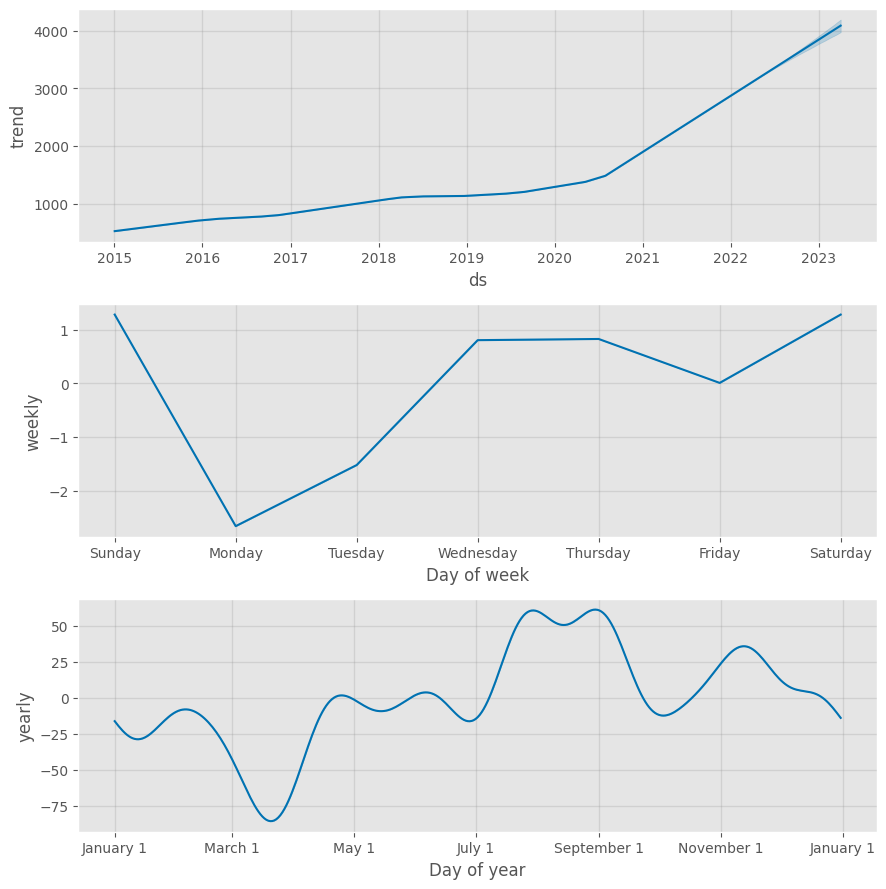

In [119]:
##### Visualize Each Components[Trends,Weekly,yearly]
model.plot_components(prediction);

## Cross Validation
Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

1. horizon the forecast horizon
2. initial the size of the initial training period
3. period the spacing between cutoff dates

In [124]:
train_data.shape

(1186, 1)

In [127]:
#cross validation
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1186 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2018-04-17 00:00:00 and 2021-04-01 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

In [128]:
#yhat is the predicted value
#y is the actual value
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-04-18,1081.303579,1049.985106,1115.640103,1075.390015,2018-04-17
1,2018-04-19,1081.541501,1049.761286,1116.719193,1089.449951,2018-04-17
2,2018-04-20,1083.327066,1049.436254,1116.401195,1077.319946,2018-04-17
3,2018-04-23,1086.220161,1054.613887,1120.035944,1073.810059,2018-04-17
4,2018-04-24,1087.239406,1056.717689,1119.943192,1022.640015,2018-04-17


##### Obtaining the Performance Metrics
We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [129]:
#obtaining the metrics
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,28332.725940,168.323278,122.780314,0.081618,0.065675,0.326705
1,37 days,28799.925116,169.705407,124.315030,0.082667,0.065675,0.322727
2,38 days,29083.784111,170.539685,124.909432,0.083091,0.066633,0.325000
3,39 days,29587.717123,172.010805,125.793300,0.082985,0.064905,0.328125
4,40 days,29874.754085,172.843149,126.708952,0.083718,0.064905,0.325000


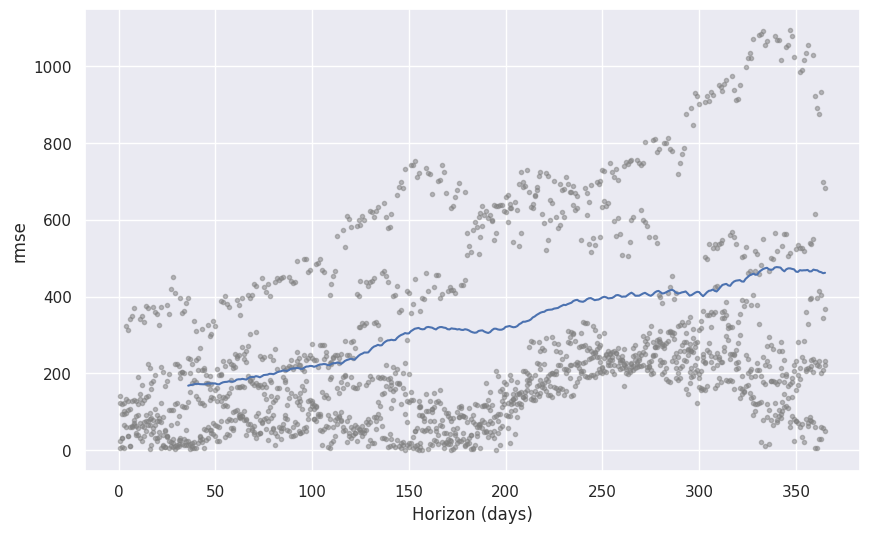

In [130]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')

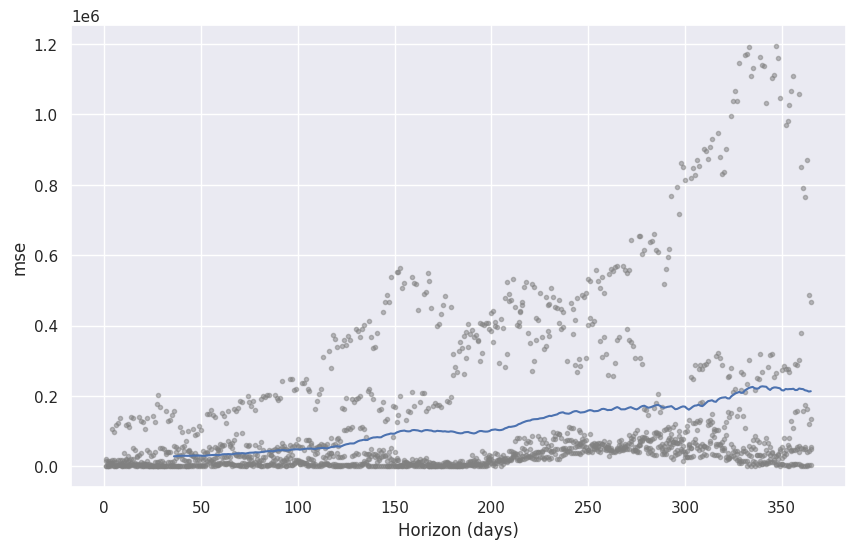

In [131]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mse')

###### Prediction for 36days which had the lowest rmse(168.32)

In [134]:
#### Create future dates of 365 days
f_dates=model.make_future_dataframe(periods=36)

In [135]:
#a month a head
f_dates.tail()

,ds
1857,2022-05-03
1858,2022-05-04
1859,2022-05-05
1860,2022-05-06
1861,2022-05-07


In [136]:
### Prediction
pred=model.predict(f_dates)

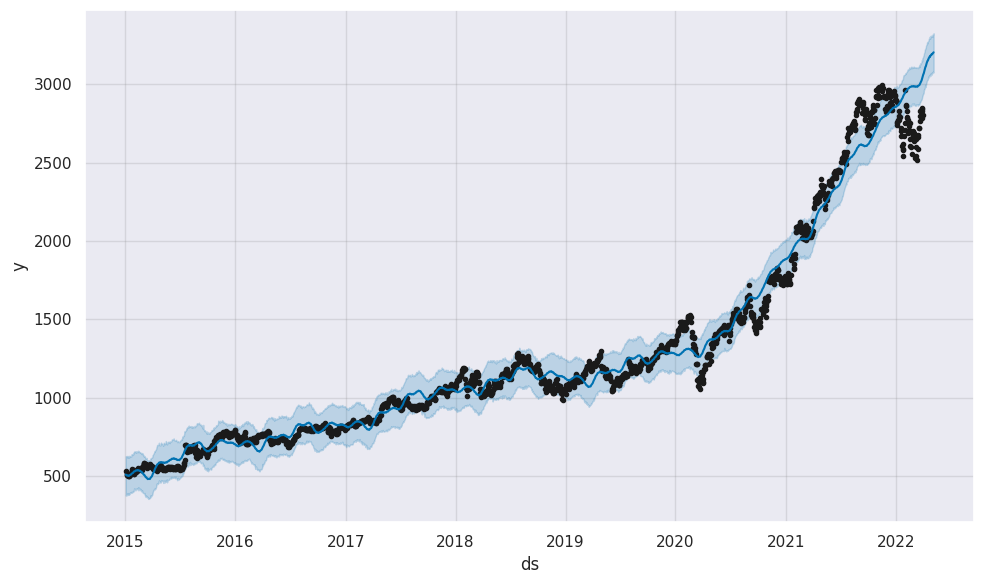

In [137]:
#### plot the predicted projection
model.plot(pred);

Our model predicts an increase in the google stock market price in the next 36 days

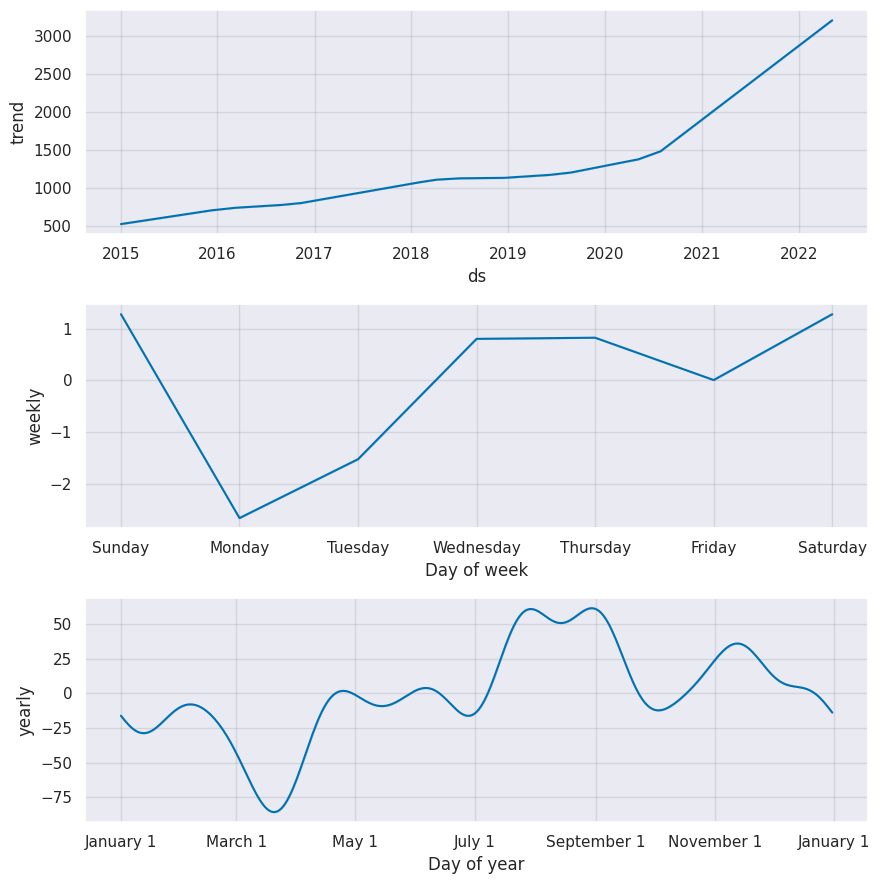

In [138]:
##### Visualize Each Components[Trends,Weekly,yearly]
model.plot_components(pred);